## Introduction

#### Problem Statement

Investigating house sales in the King County area and building a model to predict the sale price.

Before building the model, we will address the following descriptive questions through data exploration:

**1. Which locations within the King County area have the highest average house prices?**

Understanding what locations to focus.

**2. Which house attributes increase sale price?**

Understanding home buyers' preferences.

**3. Does time of the year have an impact on house sales?**

Understanding seasonal trends.

Use the dataset with house sale prices in King County, Washington State, USA from May 2014 to May 2015.

##### Evaluation criteria selection
Model should be generalized (to get good result on unseen data)

1. MAE: (1/n)*sum( abs(yi-yhat)  (not robust to outliers)---might end up giving accurate results most of the time but can make a few very poor predictions.

2. MAPE: (avg % of absoulte error over actual value)(1/n)*sum( abs(yi-yhat)/yi)*100

3. MSE : (1/n)*sum((yi-yhat)^2)   ---Great to ensure that our model has no outliers predictions with huge error

4. RMSE : MSE^0.5,   %error=RMSE*100/ybar 

5. R2 :  1- (MSE model/ MSE baseline)= 1-(sum(yi-yhat)^2/sum(ybar-yi)^2). or (TSS- RSS)/TSS ^model--> ^R2
TSS-total variation in target model. RSS- variation in target variable not explained by our model
so, TSS-RSS==variation in Y that is explained by model. R2 gives us degree of variability in the target variable is explained by model or independent variables

6. adjusted R2 : 1-( (1-R2)(N-1) / (N-P-1) )   ....P- no of predictors, N- no of rows
R2 does not consider no of features & no columns. If I add any feature it will either remain same or increase but will not decrease no matter whether that feature is contributing or not. So by default accuracy will increase if the number of features increase & at the end we will get overfitted data.
So using adjusted R2


After understanding these 6 evaluation metrics for Regression, I can't judge the model on the basis of one error metric.

So, I will use
1. To get generic & even measure on how our model is performing---  MAPE
2. To ensure our model is not making outlier predictions with huge errors---  RMSE
3. To know degree of variability in the target variable explained by model ---- R2 & adjusted R2

### Data

**Column Names and descriptions for Kings County Data Set**
* **id** - unique identified for a house
* **dateDate** - house was sold
* **Price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [3]:
import pandas as pd             
import matplotlib.pyplot as plt   
import numpy as np              
import seaborn as sns
import datetime
from datetime import datetime

In [4]:
# Read data
df = pd.read_csv('kc_house_train_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [ ]:
len(df)

Our dataset has 9761 prices from house sales in the King County area.

 #### Now we will conduct data cleaning to ensure our dataset is fit for data exploration.

1. Are there any null values? 
2. Duplicates? 
3. What does each row and column mean? 
4. How does the distribution of columns look like? 
5. Any anomolies in the data?
6. How are we dealing with these anomolies? 

In [4]:
# Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [8]:
#Checking for null 
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No null values 

In [9]:
# Cheking for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [10]:
# Cheking for rows with same id
df["id"].value_counts()>1

795000620      True
251300110      True
6021501535     True
1630700361     True
1781500435     True
              ...  
4137000460    False
1175000073    False
7137960460    False
8805400010    False
1523300157    False
Name: id, Length: 9720, dtype: bool

There are duplicate IDs in the data set which means, the data set contains data about one house sold multiple times also.

In [11]:
kcdata.value_counts()>1

id          date             price     bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long      sqft_living15  sqft_lot15
1200019     20140508T000000  647500.0  4         1.75       2060         26036     1.0     0           0     4          8      1160        900            1947      0             98166    47.4444  -122.351  2590           21891         False
6371000079  20140714T000000  575000.0  4         2.25       2070         1230      3.0     0           0     3          9      1500        570            2013      0             98116    47.5775  -122.410  1569           4802          False
6352600210  20140611T000000  809950.0  4         2.50       3280         6181      2.0     0           0     3          10     3280        0              2001      0             98074    47.6484  -122.081  3110           7570          False
6352600650  20150402T000000  936000.0  4     

1. Each Row in the data set represents houses. However, to uniquely identify a house, id is used.
2. The data contains 9761 rows.Each row represents information about sale of a house. It has resale information about the same house as a seperate row.  

### EDA 
##### Univariate Analysis

In [6]:
df.shape # to know number of rows and columns 

(9761, 21)

9761 signifies number of houses and 21 signifies features of the house

In [7]:
df.columns  #to know all the columns(variables) in dataframe 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df.head()  #to display the first 5 rows of the dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


##### Checking accuracy & completeness

In [9]:
df.bathrooms.min(),df.bathrooms.max()

(0.0, 8.0)

In [10]:
#Number of bathrooms to be 0 in house is something not acceptable
df[df.bathrooms==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3177,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
4472,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
4507,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
8840,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [11]:
#we can see grading is good so it is anomaly so dropping it
df=df[df.bathrooms!=0]

In [12]:
df.bedrooms.min(),df.bedrooms.max()

(0, 33)

In [13]:
df[df.bedrooms==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7204,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [14]:
# It's not possible to have 33 bedrooms in 1620 sqft of living space. so considering it as anomaly

In [15]:
df= df[df.bedrooms!=33] #dropping

In [16]:
df.bedrooms.max()

11

In [17]:
df[df.bedrooms==11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4011,1773100755,20140821T000000,520000.0,11,3.0,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960


In [18]:
#This is possible
#Zipcode is rightly given

In [19]:
df[df.floors==df.floors.max()] #possible

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6756,8673400177,20150402T000000,525000.0,3,3.0,1730,1074,3.5,0,0,...,8,1730,0,2006,0,98107,47.6692,-122.392,1370,1185
8377,1346300150,20141020T000000,3300000.0,8,4.0,7710,11750,3.5,0,0,...,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325


In [20]:
# Checking Reliability
wo_p=df.drop(['price'], axis=1)
wo_p=wo_p.drop(['id'], axis=1)
wo_p[wo_p.duplicated()]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No duplicate rows found

In [24]:
#Checking if any house is sold more than once
sum(df["id"].value_counts()>1) #taking id because it's the unique feature for every house

40

Yes. 40 houses are sold more than once

    Timeliness 
    We have data of 2014 & 2015 year. So 7 years old data. In our case having data uptodate is important as price increases continuously

In [21]:
df.dtypes #data type of each variable

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### EDA

In [25]:
# making list of categorical variables  out of all variables 
categorical_variables = [variable for variable in df.columns if df[variable].dtypes == 'O'] 
#for each of the variable in df.column, if datatype of variable is equal to object then it will be categorical variable  

print('Number of categorical variables: ', len(categorical_variables ))

# visualising first 5 rows of the categorical variables 
df[categorical_variables ].head()

Number of categorical variables:  1


,date
0,20141209T000000
1,20140512T000000
2,20140527T000000
3,20140528T000000
4,20141007T000000


In [26]:
# making list of numerical variables out of all variables 
numerical_variables = [variable for variable in df.columns if df[variable].dtypes != 'O'] 
#for each of the variable in df.column, if datatype of variable is not equual to object then numerical variable

print('Number of numerical variables: ', len(numerical_variables))

# visualising first 5 rows of the numerical variables
df[numerical_variables].head()

Number of numerical variables:  20


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


Further dividing Numerical variables into discrete and continuous variables

In [27]:
#discrete variables
discrete_variables=[variable for variable in numerical_variables if len(df[variable].unique())<30]
#for each of the variable in numerical_variables, if unique values of variable are less than 30 then it will be a discrete variable  

print("Discrete Variables Count: {}".format(len(discrete_variables))) #printing no of discrete variables 

# visualising first 5 rows of the discrete variables
df[discrete_variables].head() 

Discrete Variables Count: 7


,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,4,3.00,1.0,0,0,5,7
1,4,4.50,1.0,0,0,3,11
2,2,1.00,1.0,0,0,4,7
3,3,1.00,1.5,0,0,4,7
4,3,1.75,1.0,0,0,4,7


In [28]:
#continuous variables
continuous_variables=[variable for variable in numerical_variables if variable not in discrete_variables + ["date"]]
#for each of the variable in numerical_variables, if variable is not in the discrete_variables then it will be a continuous variable  

print("Continuous variables Count {}".format(len(continuous_variables))) #printing no of continuous variables

# visualising first 5 rows of the continuous variables
df[continuous_variables].head() 

Continuous variables Count 13


,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,604000.0,1960,5000,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,1225000.0,5420,101930,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,468000.0,1160,6000,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,310000.0,1430,19901,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,400000.0,1370,9680,1370,0,1977,0,98074,47.6127,-122.045,1370,10208



#### Univariate Analysis

Questions:
1. What is the description of each variable in the data ? 
2. what is the distribution form of every variable? what will be the future reference ?
3. Whether the variable is leptokurtic or platykurtic or mesokurtic?. what will be the future reference ?
4. What is the range of variable? what will be the future reference ?

#Description of each variable
1. id	--------------> House id ----->	Numerical- discrete
2. date--------------> Date house was sold	----->  date-time
3. price  --------------> Price of house -----> TARGET ----->  Numerical - continuous
4. bedrooms --------------> no of bedrooms per house-----> Numerical- discrete
5. bathrooms --------------> no of bathrooms per house ----->	Numerical- discrete
6. sqft_living--------------> square feet of the living space ----->	Numerical - continuous
7. sqft_lot--------------> square feet of the land space ----->	Numerical - continuous
8. floors--------------> Total floors (levels) in house ----->	Numerical- discrete
9. waterfront --------------> House which has a view to a waterfront ----->	Categorical- Nominal
10. view --------------> How good the view is -----> 	Categorical- Ordinal
11. condition --------------> How good the condition is Overall ----->	Categorical- Ordinal
12. grade --------------> overall grade given to the house ----->	Categorical- Ordinal
13. sqft_above --------------> square feet of house apart from basement ----->  Numerical - continuous
14. sqft_basement --------------> square feet of the basement ----->	Numerical - continuous
15. yr_built --------------> Built Year ----->	Numerical - continuous
16. yr_renovated --------------> Year when house was renovated ----->	Numerical - continuous
17. zipcode --------------> zip code----->	Categorical- Nominal
18. lat --------------> Latitude coordinate	 ----->     Numerical - continuous
19. long --------------> Longitude coordinate ----->	Numerical - continuous
20. sqft_living15 --------------> Living room area in 2015(implies-- some renovations) -----> Numerical - continuous
21. sqft_lot15 --------------> lotSize area in 2015(implies-- some renovations) ----->	Numerical - continuous


In [29]:
#Univariate analysis of discrete variables
df[discrete_variables].describe() #statistical summary

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
count,9756.000000,9756.000000,9756.000000,9756.000000,9756.000000,9756.000000,9756.000000
mean,3.374231,2.118081,1.486009,0.008405,0.248155,3.415744,7.661849
std,0.910370,0.772972,0.532331,0.091298,0.788059,0.650020,1.180199
min,0.000000,0.750000,1.000000,0.000000,0.000000,1.000000,4.000000
25%,3.000000,1.750000,1.000000,0.000000,0.000000,3.000000,7.000000
50%,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.000000
75%,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.000000
max,11.000000,8.000000,3.500000,1.000000,4.000000,5.000000,13.000000


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

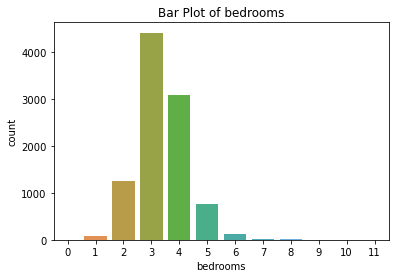

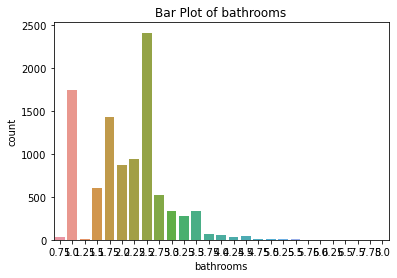

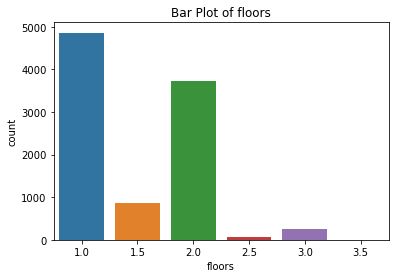

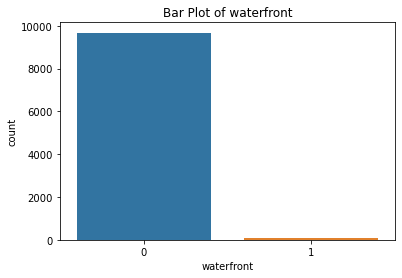

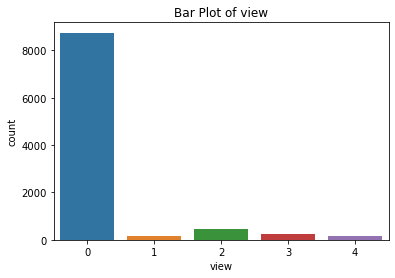

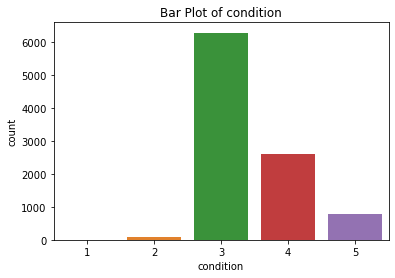

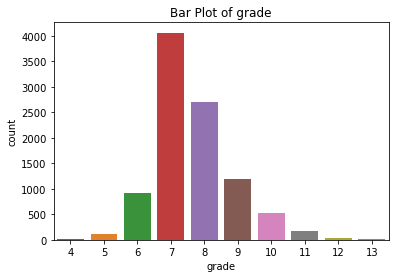

In [30]:
for variable in discrete_variables:          #for each variable in discrete_variables do:
        plt.figure()                          #to create a new figure with customizations
        plt.clf()                             #to clear the entire current figure
        sns.countplot(df[variable]).set_title('Bar Plot of '+ variable) #Plotting barplot for column and Setting up the title
        #df.plot.bar(variable)
        #plt.bar(variable)

In [31]:
#Univariate analysis of continuous variables
df[continuous_variables].describe()  #statistical summary

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.756000e+03,9.756000e+03,9756.000000,9.756000e+03,9756.000000,9756.000000,9756.000000,9756.000000,9756.000000,9756.000000,9756.000000,9756.000000,9756.000000
mean,4.605541e+09,5.427397e+05,2086.711972,1.521612e+04,1793.178044,293.533928,1970.796228,86.110701,98077.801763,47.560050,-122.214403,1992.225605,12823.377101
std,2.876425e+09,3.795078e+05,926.802640,4.127676e+04,835.212633,442.676745,29.243997,405.516572,53.210968,0.140253,0.139823,686.806551,26523.750140
min,1.200019e+06,8.000000e+04,370.000000,5.200000e+02,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,1420.000000,5.100000e+03,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467750,-122.327000,1490.000000,5160.000000
50%,3.905061e+09,4.500000e+05,1912.000000,7.641500e+03,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572250,-122.229000,1840.000000,7660.000000
75%,7.340102e+09,6.490000e+05,2570.000000,1.065250e+04,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680425,-122.126000,2370.000000,10112.250000
max,9.900000e+09,7.700000e+06,12050.000000,1.651359e+06,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for id = 0.23513764461679326
Kurtosis for id= -1.2668773264112836
CV for id= 1.6011338071796375
skewness for price = 4.300286791704252
Kurtosis for price= 38.95399575718427
CV for price= 1.430114548790694
skewness for sqft_living = 1.4266201704114188
Kurtosis for sqft_living= 4.571283719764091
CV for sqft_living= 2.2515170791498753


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for sqft_lot = 13.600874600435674
Kurtosis for sqft_lot= 346.3827776204621
CV for sqft_lot= 0.3686363743626648
skewness for sqft_above = 1.4525744887950396
Kurtosis for sqft_above= 3.406568558639588
CV for sqft_above= 2.1469718889685008


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for sqft_basement = 1.4696738436337458
Kurtosis for sqft_basement= 1.7074684688334996
CV for sqft_basement= 0.6630886562845336


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for yr_built = -0.4623689353796021
Kurtosis for yr_built= -0.6572932160881071
CV for yr_built= 67.39147930469709
skewness for yr_renovated = 4.497633087210426
Kurtosis for yr_renovated= 18.233881584946808
CV for yr_renovated= 0.2123481678172332


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for zipcode = 0.4137225527276195
Kurtosis for zipcode= -0.8407729359477063
CV for zipcode= 1843.1876941511869
skewness for lat = -0.4788871344869345
Kurtosis for lat= -0.7097595835437867
CV for lat= 339.10197589477207


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for long = 0.8766964176812762
Kurtosis for long= 1.0335720136363733
CV for long= -874.0641364909056
skewness for sqft_living15 = 1.1002252711711116
Kurtosis for sqft_living15= 1.535669561190983
CV for sqft_living15= 2.9007085061408575


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for sqft_lot15 = 7.754827706858403
Kurtosis for sqft_lot15= 78.84693491019746
CV for sqft_lot15= 0.48346772359864043


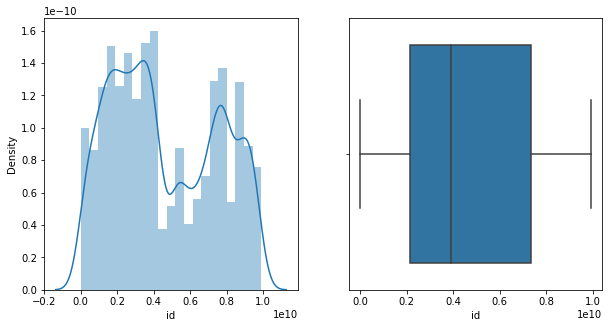

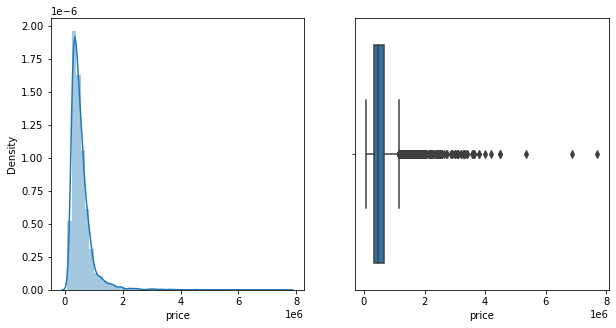

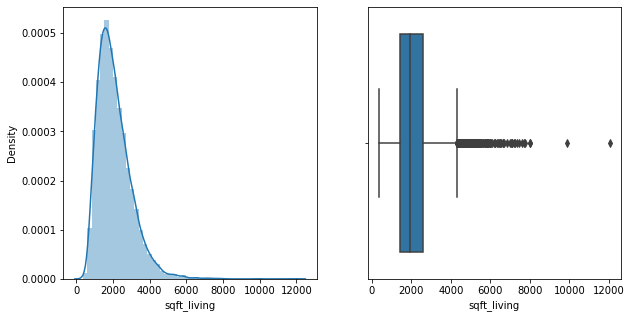

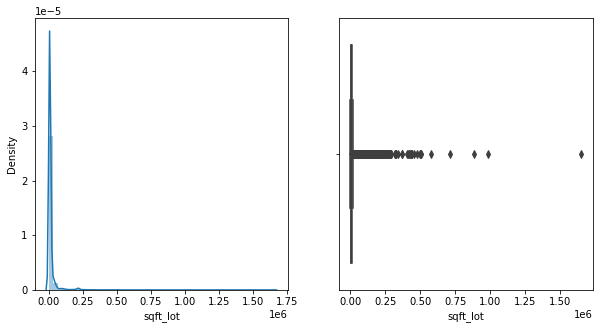

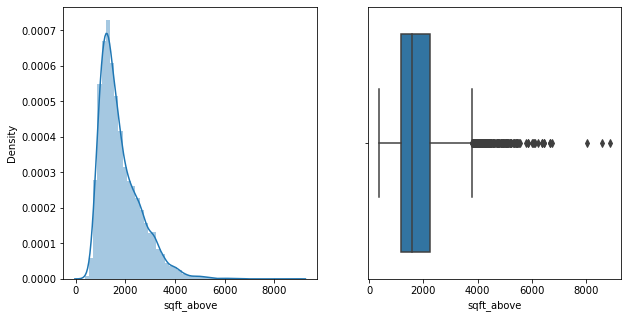

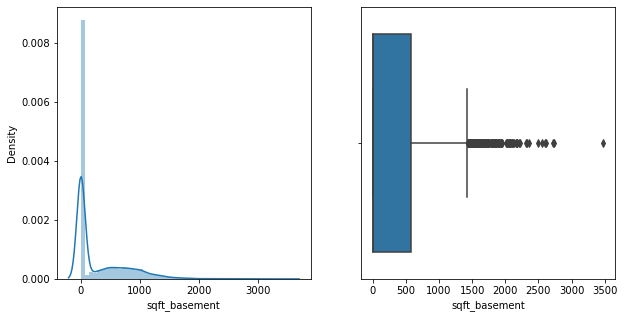

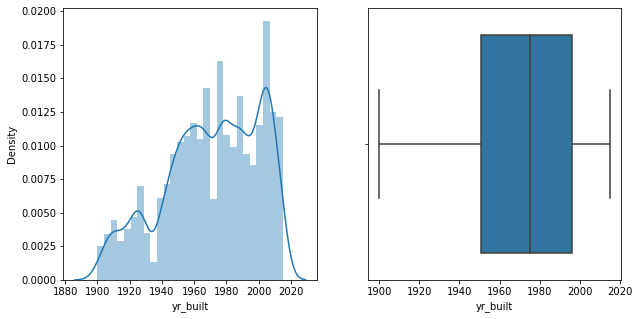

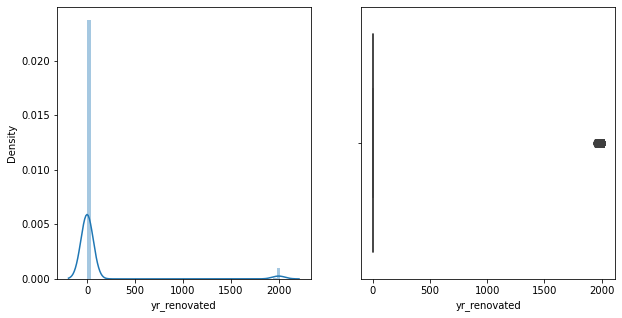

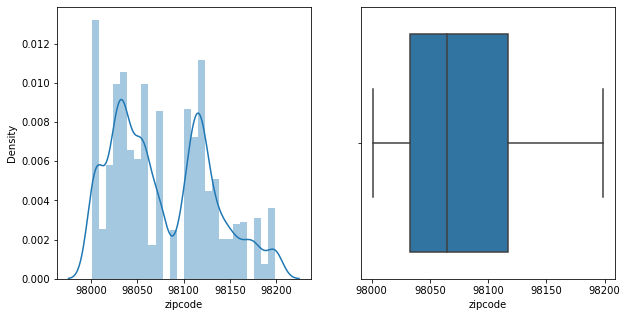

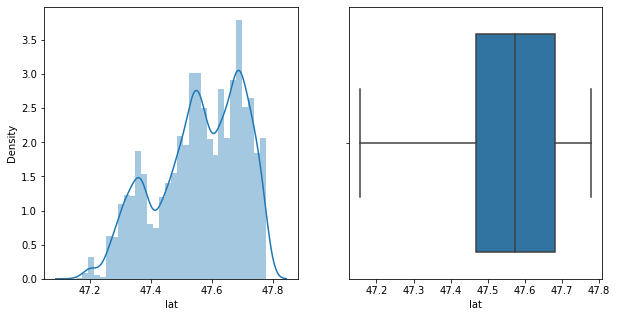

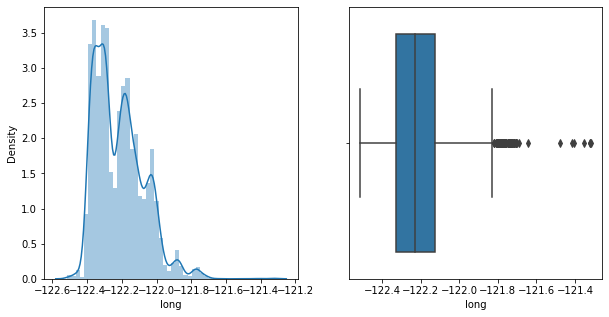

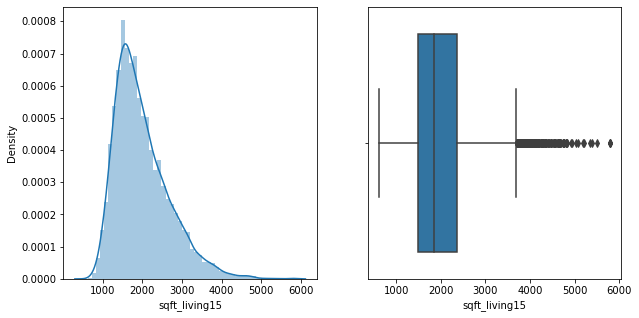

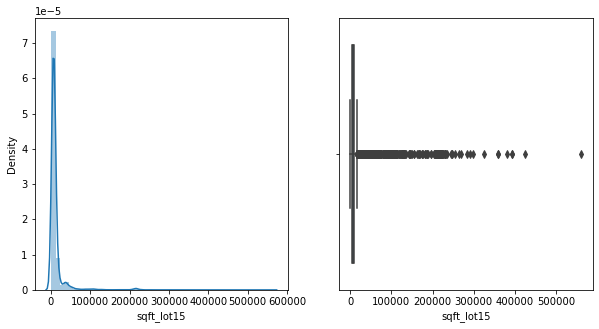

In [32]:
for variable in continuous_variables:          #for each variable in continuous_variables do:
    fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
    sns.distplot(df[variable], kde=True, ax=axs[0])   #plot histogram
    sns.boxplot(x= variable, data=df, ax=axs[1])   #plot boxplot
    print("skewness for {} = {}".format(variable, df[variable].skew()))  #print skewness
    print("Kurtosis for {}= {}".format(variable, df[variable].kurtosis()))  #print kurtosis
    print("CV for {}= {}".format(variable, df[variable].mean()/df[variable].std()))  #print CV 

Analysis:
#### Price


1. Average price is 5.427350e+05   #mean
2. highest price is 7.700000e+06	
3. minimum price is 8.000000e+04
4. 25% of houses have price less than (or 75% of houses have price greater than) 3.200000e+05	
5. 25 % of houses have price higher than ((or 75% of houses have price lesser than)) 6.490000e+05
6. median- 4.500000e+05
7. 50% of houses have price in between 3.200000e+0535 and 6.490000e+05
8. IQR= 329000 #IQR 
9. Lower Fence= 320000- 1.5*329000
10. Upper Fence= 649000 + 1.5*329000
11. skewness for price = 4.2980618120838665   #highly skewed
12. Kurtosis for price= 38.92571599487915   #leptokurtic
13. CV=1.43

#### Sqft_living

1. Distribution is right skewed
2. skewness for sqft_living = 1.425825591484237  #highly skewed
3. Kurtosis for sqft_living= 4.563590934315643  #leptokurtic
4. CV= 2.251

#### sqft_lot
1. right skewed
2. skewness for sqft_lot = 13.60387975464059 #highly skewed
3. Kurtosis for sqft_lot= 346.54435075031313 #leptokurtic
4. CV=0.368

#### sqft_above
1. Right skewed
2. skewness for sqft_above = 1.4527483169440447    #highly skewed
3. Kurtosis for sqft_above= 3.404209642036738     #leptokurtic
4. CV= 2.146

#### sqft_basement
1. right skewed
2. skewness for sqft_basement = 1.4700830337421202   #highly skewed
3. Kurtosis for sqft_basement= 1.709084533795696     # platykurtic
4. CV= 0.663

#### yr_built
1. Left skewed
2. skewness for yr_built = -0.46259123825197745  #Fairly symmetrical
3. Kurtosis for yr_built= -0.6568681294667256  #platykuric
4. CV=  67.39

#### yr_renovated
1. right skewed
2. skewness for yr_renovated = 4.498950793053122  #Highly skewed
3. Kurtosis for yr_renovated= 18.245737621987267  #leptokurtic
4. CV=0.21

#### lat

1. skewness for lat = -0.4788661902319015 #fairly symmetrical
2. Kurtosis for lat= -0.709558458526709 #platykurtic 
4. CV=339.10

#### long
1. Right skewed
2. skewness for long = 0.8766953018685205 #Moderately skewed
3. Kurtosis for long= 1.0304279152773455  #platykurtic
4. CV=-874.06

#### sqft_living15
1. Right skewed
2. skewness for sqft_living15 = 1.1028334076065052 #Highly skewed
3. Kurtosis for sqft_living15= 1.5455580439797827 #platykurtic
4. CV=2.9

#### sqft_lot15
1. Right skewed
2. skewness for sqft_lot15 = 7.755503376203744 #Highly skewed
3. Kurtosis for sqft_lot15= 78.870196513143 #leptokurtic
4. CV=0.48

In [33]:
#for date variables:
#date column conversion
df["date"] = df["date"].str.slice(0, 8) # striped only date part 
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d') #converted date string into date
df['yr_sold'] = pd.DatetimeIndex(df['date']).year #extracting year from date for future references
df.head() #display data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014


In [34]:
#Analyzing date time variables
# list of variables that contain year variables
years_variables = [variable for variable in numerical_variables if 'yr' in variable]
years_variables

['yr_built', 'yr_renovated']

In [35]:
# Understanding the year variable
for variable in years_variables:
    print(variable,df[variable].unique())

yr_built [1965 2001 1942 1927 1977 1979 1916 1947 1995 1985 1941 1915 1948 1981
 1996 2014 1959 2003 1966 1953 1955 1950 1954 1989 1968 1973 2005 1956
 2002 1952 1925 1961 1988 1939 1975 1980 1992 1910 1991 2010 1987 1914
 1978 2004 1986 1923 1960 1990 1962 1976 1949 2008 1920 2007 1997 1994
 1993 1999 1983 1904 1940 1928 2006 1937 1982 1969 1929 1957 1964 1913
 1984 1908 1943 1922 1911 1930 1907 2013 1958 1998 1967 1909 1974 1972
 1912 1917 1900 2000 1924 1951 1932 1971 1946 1963 2012 1970 1944 1918
 1905 2009 1936 1926 1906 1902 1938 1919 1903 1921 1931 1901 1933 1945
 2011 1935 2015 1934]
yr_renovated [   0 1992 1994 1978 2005 2008 1984 2014 1974 1983 2013 2003 1945 1990
 1988 1957 1977 1995 2000 1999 1986 2007 1987 1973 2006 2001 1980 1997
 2002 1950 1991 2015 1989 1963 1962 1996 1981 1972 1970 1985 2004 1982
 1993 2010 2011 1971 2009 1998 1969 1940 1976 2012 1946 1964 1975 1953
 1958 1959 1967 1968 1956 1955 1960 1979 1965]


Year renovated = 0 signifies that the house has not been renovated.

#### Bivariate Analysis

#What we think 
1. Sqft_living area -----------------------------> More area more price 
2. bedrooms more------------------------> more price  
3. Bathrooms -------------------------------------> Doesn't impact as much as the bedrooms
4. SQFT lot more ---------------------------------> more price 
5. Age of home------------------------------------> older, cheaper 
6. Recent innovation----->atleast renovated------->not renovated (For old building) 
7. Grading ---------------------------------------> Higher, more price
8. floors ----------------------------------------> More floors more price when the sqft area is good. 
9. water front -----------------------------------> More costly 
10. view ------------------------------------------> good views -->more costly 
11. area (latitude, longitude, zipcode) -----------> good area--> good price 
12. condition-------------------------------------> good condition --> good price
13. sqft_above ----------------------------> more sqft_above ---> good price
14. sqft_basement -------------------------> more sqft_basement----->good price
15. yr_built   --------------------------> older the house------>less price
16. yr_renovated ------------------------> if renovated---> more price 

In [36]:
#Correlation 
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
id,1.000000,-0.005789,-0.000193,0.005768,-0.007380,-0.130296,0.007692,0.000826,0.023331,-0.015223,...,-0.006273,-0.003616,0.026957,-0.024922,-0.012157,0.009261,0.034169,-0.000979,-0.137536,0.011934
price,-0.005789,1.000000,0.316618,0.528419,0.704920,0.094101,0.262953,0.275061,0.399787,0.044372,...,0.611304,0.322475,0.051745,0.120508,-0.055744,0.299141,0.024089,0.584656,0.077822,0.014308
bedrooms,-0.000193,0.316618,1.000000,0.532433,0.594516,0.031254,0.194943,-0.007014,0.084874,0.027911,...,0.492509,0.315465,0.167177,0.020046,-0.159165,-0.014469,0.129013,0.402078,0.020493,-0.004087
bathrooms,0.005768,0.528419,0.532433,1.000000,0.760804,0.079554,0.503304,0.061471,0.182907,-0.117148,...,0.695200,0.281188,0.500919,0.044577,-0.202496,0.018310,0.219978,0.568283,0.069048,-0.012518
sqft_living,-0.007380,0.704920,0.594516,0.760804,1.000000,0.162811,0.366058,0.097271,0.285944,-0.048459,...,0.878840,0.435496,0.322720,0.043662,-0.203939,0.054685,0.240799,0.757873,0.163465,-0.016427
sqft_lot,-0.130296,0.094101,0.031254,0.079554,0.162811,1.000000,-0.003540,0.029419,0.099219,-0.008631,...,0.180975,-0.000585,0.054049,0.001215,-0.126090,-0.092284,0.224692,0.145270,0.719922,0.004362
floors,0.007692,0.262953,0.194943,0.503304,0.366058,-0.003540,1.000000,0.022458,0.031980,-0.265666,...,0.534763,-0.242562,0.481777,0.013682,-0.064395,0.044966,0.134549,0.289117,-0.013310,-0.008208
waterfront,0.000826,0.275061,-0.007014,0.061471,0.097271,0.029419,0.022458,1.000000,0.402721,0.024026,...,0.064368,0.082204,-0.027003,0.101676,0.023639,-0.009410,-0.039204,0.097312,0.028506,-0.014337
view,0.023331,0.399787,0.084874,0.182907,0.285944,0.099219,0.031980,0.402721,1.000000,0.059932,...,0.170489,0.276994,-0.056334,0.109719,0.075776,0.005508,-0.074507,0.292798,0.079927,0.003411
condition,-0.015223,0.044372,0.027911,-0.117148,-0.048459,-0.008631,-0.265666,0.024026,0.059932,1.000000,...,-0.154216,0.189509,-0.357579,-0.055655,0.002807,-0.017987,-0.105342,-0.080333,0.002505,-0.046453


here, price is 
highly correlated with-       sqft_living 
moderate correlation with-    bathrooms	, view	, grade, sqft_above, sqft_living15
weak correlation with-        bedrooms,floors, waterfront, sqft_basement, yr_renovated,lat	
no correlation with-          id, sqft_lot, view, condition	, yr_built, zipcode, long, sqft_lot15, yr_sold

#Surprising points
We see that price and sqft_living has very high correlation as  expected. 
However, sqft_lot, yr_built, yr_sold, condition have no correlation which we thought have higher impact

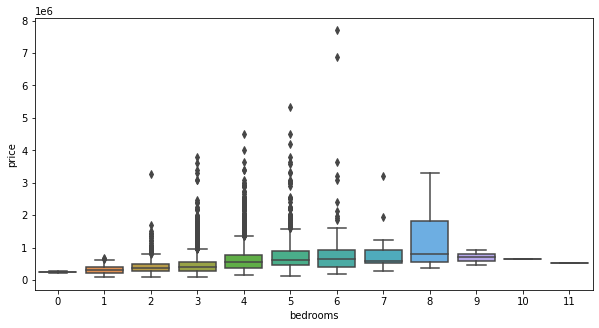

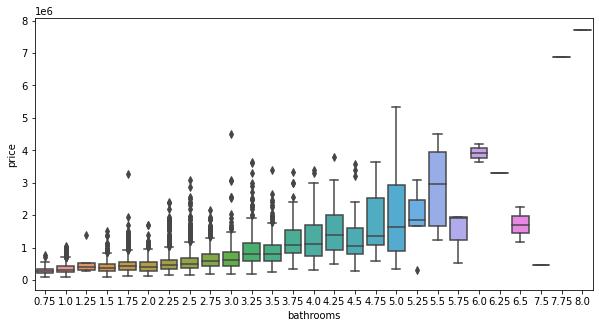

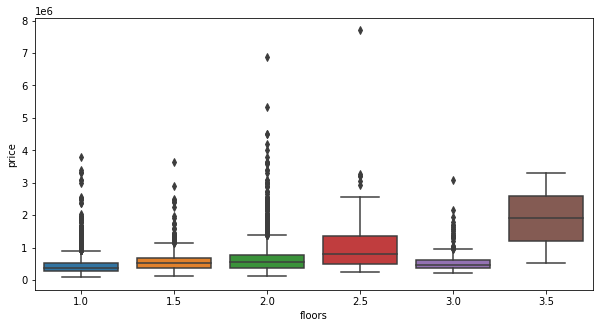

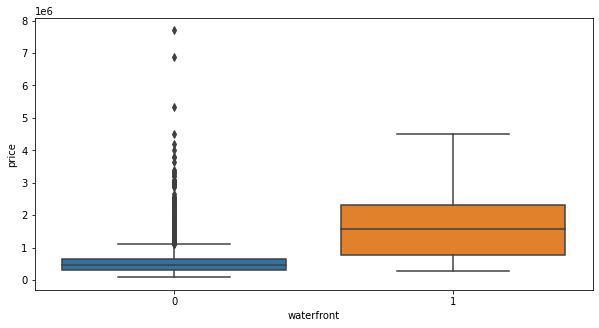

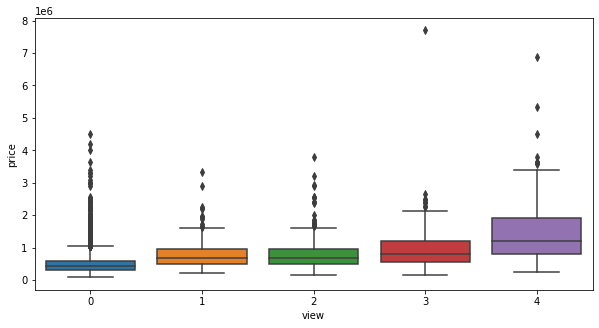

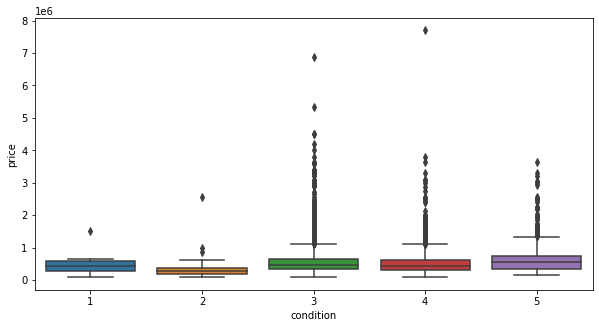

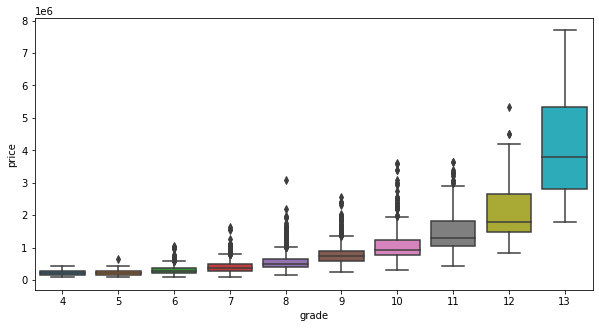

In [377]:
#bivariate analysis od discrete variables with price
for variable in discrete_variables:
    fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, figsize=fig_dims)
    sns.boxplot(data = df, x = df[variable], y = "price" )

### Bivariate analysis of each discrete variable with price



#### bedroom 

1. houses with more number of bedrooms have higher price

#### bathrooms

1. houses with more number of bathrooms have higher price

#### floors 


1. as number of floors increases price of house increases (except for 3rd floor)
Q- Do sqft_above plays roll in number of floors? 

#### waterfront 

1. houses with waterfront have higher price

#### View 

1. As the view rating increases price of house also increases
Q- whether houses having waterfront are given higher view rating?

#### condition 

1. houses with higher condition rating (3,4,5) comprise higher prices
Q- Does price of house being high for houses comprising higher condition rating is because of year built ? 

#### Grade 

1. As grade increases price of house is increasing exponentially

In [378]:
#checking floor question
df.groupby('floors').sqft_above.median()

floors
1.0    1260.0
1.5    1540.0
2.0    2320.0
2.5    2730.0
3.0    1490.0
3.5    3910.0
Name: sqft_above, dtype: float64

sqft_above contributing here. sqft_above have more impact rather than floors(from correlation)

<AxesSubplot:xlabel='condition', ylabel='yr_built'>

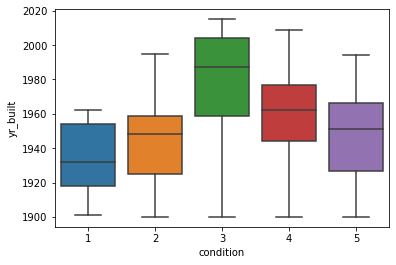

In [379]:
#Checking condition question is true or not
sns.boxplot(x= 'condition', y='yr_built', data= df)

here we can see that houses comprising condition (3,4,5 ) have year built afterward(newer houses)
Hence year built plays role here.
from 3 to 5 we can see that condition rating is higher for earlier built house is it because of renovation? 

<Figure size 576x288 with 0 Axes>

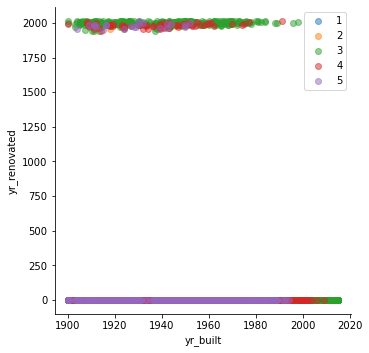

<Figure size 576x288 with 0 Axes>

In [380]:
#checking whether condition rating is correlated with year built and year_renovated both?
g = sns.PairGrid(df,x_vars=['yr_built'],y_vars="yr_renovated",hue= "condition", height=5)
g.map(plt.scatter,alpha=0.5)
plt.legend(loc=(0))
plt.figure(figsize=(8,4))

As we can see in the graph houses with built year earlier which are not renovated has condition rating of 5 
Hence condition is not correlated with year renovated and hence also not with year built.

In [381]:
#checking view question is true or not
df.groupby('waterfront').view.mean()

waterfront
0    0.218937
1    3.695122
Name: view, dtype: float64

as houses with no waterfront have mean rating of ~0 and houses with waterfront have mean rating of ~4,
Waterfront plays role in view rating

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


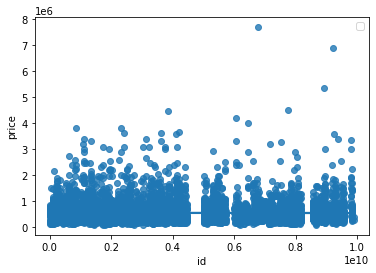

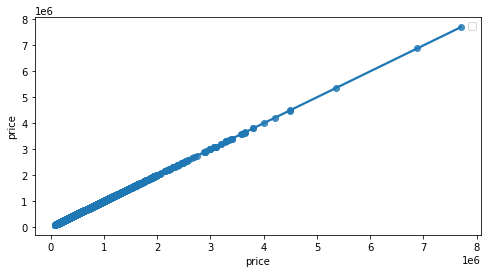

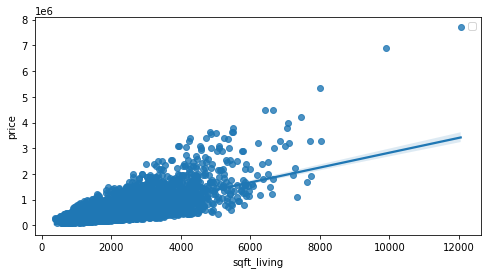

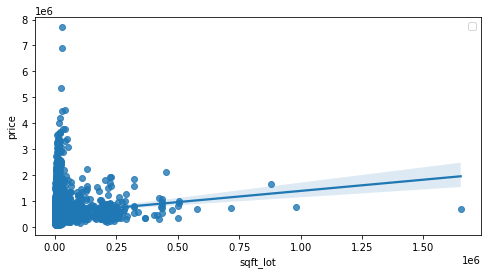

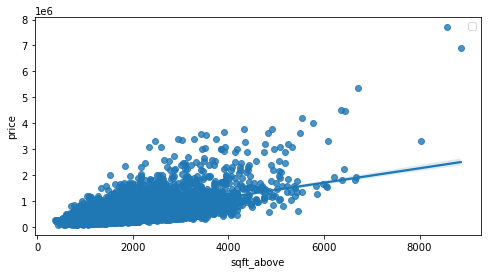

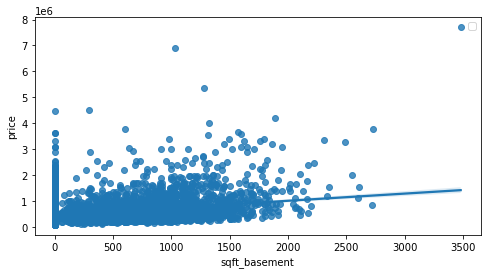

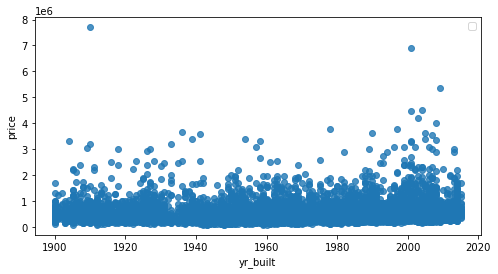

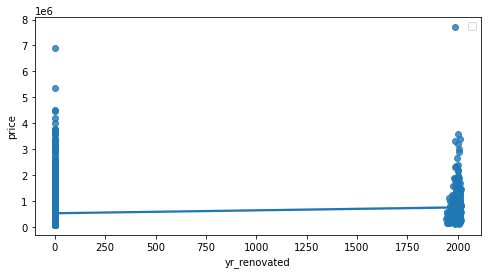

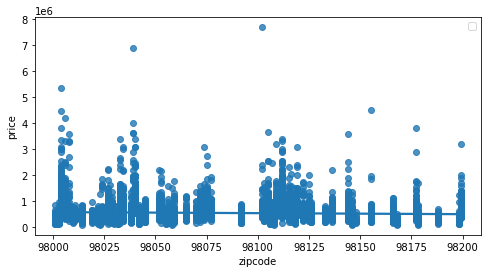

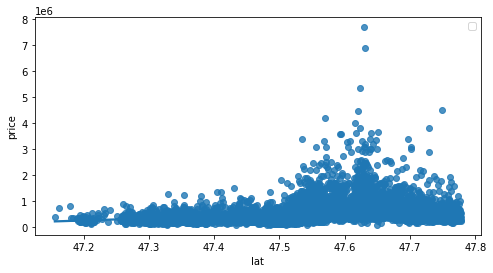

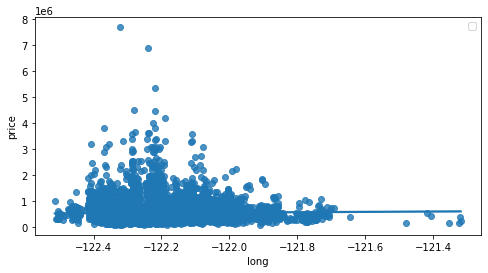

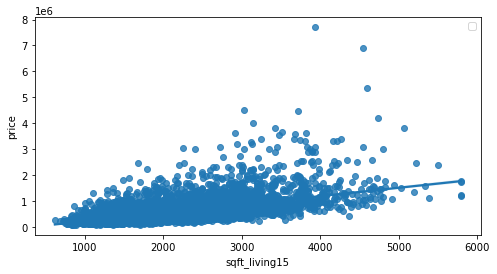

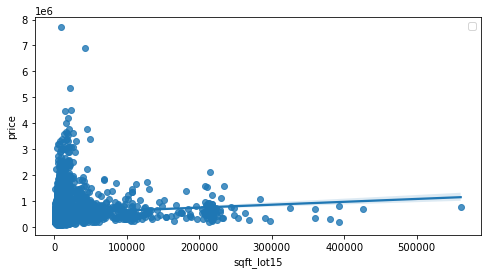

<Figure size 576x288 with 0 Axes>

In [382]:
#Bivariate analysis of continuous variables
for variable in continuous_variables:
    sns.regplot(x= variable, y='price', data=df)
    plt.legend(loc=(0))
    plt.figure(figsize=(8, 4))

### Bivariate analysis of each continuous variable with price

#### sqft_living 

1. As the sqft_living increasing price is also increasing

#### sqft_lot 
1. We did not see much correlation between lot area and price of the house. Here in the scatter plot also, the price seems to be high for the houses with less lot area also.  

#### sqft above 

1. As the sqft_living increasing price is also increasing


#### sqft_basement 

1. As per regression line as sqft_basement increasing price increasing but it's not true for all houses

#### lat 
1. In graph at specific lat, house prices are higher

#### long
1. In graph at specific long, house prices are higher

#### sqft living 15 
1. As the sqft_living15 increasing price is also increasing

#### sqft lot 15 

1. We did not see much correlation between lot area and price of the house. Here in the scatter plot also, the price seems to be high for the houses with less lot area also.  

Text(0.5, 1.0, 'House Price vs Year Sold')

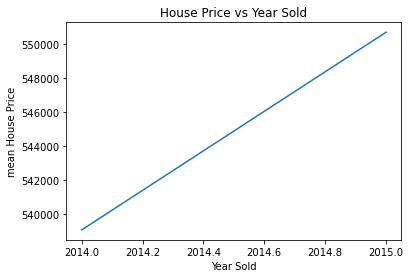

In [383]:
# checking whether there is a relation between year the house is sold and the price

df.groupby('yr_sold')['price'].mean().plot()
plt.xlabel('Year Sold')
plt.ylabel('mean House Price')
plt.title("House Price vs Year Sold")

We can see from the graph as the year increasing house price is also increasing

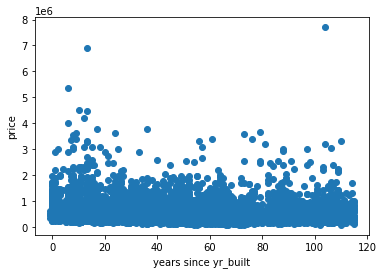

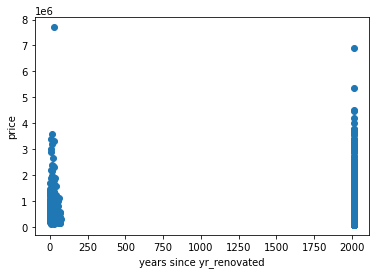

In [384]:
#Analyzing relationship between difference of year variables and year sold with house price(to get age)

for variable in years_variables:
    if variable!='yr_sold':
        data=df.copy()
        ## taking the difference between year variable and year the house was sold for
        data[variable]=data['yr_sold']-data[variable]
        plt.scatter(data[variable],data['price'])
        plt.xlabel('years since ' +  variable)
        plt.ylabel('price')
        plt.show()

Surprising point-
 As per our belief The earlier built date of the house result in the lower house price but here newely built also have same prices as earlier built houses have.


 As per our belief, renovated houses results in higher house price but here houses which are not renovated also have higher prices. 

##### Based on our EDA analysis & correlation selecting -
Selected Features set 1 - bedroom, bathroom,  sqft_living, sqft_living 15, condition, view, grade, sqft_basement, sqft above

### Decision Tree

### Experiment 1

In [385]:
#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

#For plotting a decision tree
from sklearn import tree

#for cross validation
from sklearn.model_selection import cross_val_score

#for R2 
from sklearn.metrics import r2_score

In [391]:
#set1
Y = df["price"]
X = df[["bedrooms","bathrooms","sqft_living","view", "grade", "sqft_above","sqft_basement","sqft_living15", 'condition']]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)


reg = DecisionTreeRegressor() # default settings

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)

#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((y_pred - y_valid)**2)))/np.mean(y_valid))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
print("MAE  = ", np.mean(np.abs(y_pred-y_valid)))
#calculating MAPE
print("MAPE = ", np.mean(np.abs((y_valid-y_pred)*100/y_valid)))

#calculating r2
r2=reg.score(X_valid, y_valid)
print("r2= ", r2)

#calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)
 

RMSE =  56.0
MAE  =  193488.60919775863
MAPE =  39.20675192344657
r2=  0.29565427337398154
Adjusted r2=  0.2930445115215179


In [387]:
#Adding some more features which affect house price according to research - yr_built, location ie lat, yr_sold
Y = df["price"]
X = df[["bedrooms","bathrooms","sqft_living","view", "grade", "sqft_above","sqft_basement",
        "sqft_living15", 'condition','yr_built','lat', 'yr_sold']]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)


reg = DecisionTreeRegressor() # default settings

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)
#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((y_pred - y_valid)**2)))/np.mean(y_valid))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
print("MAE  = ", np.mean(np.abs(y_pred-y_valid)))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((y_valid-y_pred))/y_valid)*100)

#calculating r2
r2=reg.score(X_valid, y_valid)
print("r2= ", r2)

#calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)

RMSE =  46.0
MAE  =  128998.73349733498
MAPE =  22.184301291034476
r2=  0.6037000371096255
Adjusted r2=  0.6017397734844464


In [388]:
#Errors reduced by considerable amount
#r2 score & adjusted r2 is also further improved by considerable amount

In [389]:
#To further improve our performance we will do Feature Engineering

### Feature Engineering

##### 1. We transforming the variable yr_built to the age of house in years.

In [392]:
data=df.copy()
data["Age"]= data['yr_sold']-data['yr_built']
data.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,13
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,300,1942,0,98115,47.6900,-122.292,1330,6000,2014,72
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,0,1927,0,98028,47.7558,-122.229,1780,12697,2014,87
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,0,1977,0,98074,47.6127,-122.045,1370,10208,2014,37
5,9297300055,2015-01-24,650000.0,4,3.00,2950,5000,2.0,0,3,...,970,1979,0,98126,47.5714,-122.375,2140,4000,2015,36
6,6865200140,2014-05-29,485000.0,4,1.00,1600,4300,1.5,0,0,...,0,1916,0,98103,47.6648,-122.343,1610,4300,2014,98
7,6300500875,2014-05-14,385000.0,4,1.75,1620,4980,1.0,0,0,...,760,1947,0,98133,47.7025,-122.341,1400,4980,2014,67
8,7137970340,2014-07-03,285000.0,5,2.50,2270,6300,2.0,0,0,...,0,1995,0,98092,47.3266,-122.169,2240,7005,2014,19
9,8091400200,2014-05-16,252700.0,2,1.50,1070,9643,1.0,0,0,...,0,1985,0,98030,47.3533,-122.166,1220,8386,2014,29


In [393]:
data=data.drop(['date'],axis=1) #we have year sold

In [394]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age
0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
1,7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,13
2,9212900260,468000.0,2,1.00,1160,6000,1.0,0,0,4,...,300,1942,0,98115,47.6900,-122.292,1330,6000,2014,72
3,114101516,310000.0,3,1.00,1430,19901,1.5,0,0,4,...,0,1927,0,98028,47.7558,-122.229,1780,12697,2014,87
4,6054650070,400000.0,3,1.75,1370,9680,1.0,0,0,4,...,0,1977,0,98074,47.6127,-122.045,1370,10208,2014,37


#### 2. Converting area

In [395]:
data['yr_sold'].unique()

array([2014, 2015], dtype=int64)

Sqft areas lot and living will be relevant just before they are sold.

There is no point in considering 2014 area for a house sold in 2015

when there is a change in 2015 

So creating a column that has only relevant areas 

In [396]:
# s_living=[]
# s_lot=[]
# j=0
# for i in data.yr_sold:
#     if i==2014:
#         s_living.append(data['sqft_living'][j])
#         s_lot.append([j])
#     if i == 2015:
#         s_living.append(data['sqft_living15'][j])
#         s_lot.append(data['sqft_lot15'][j])
#     j+=1  

In [397]:
sqft_living=list(data['sqft_living'])
sqft_living15=list(data['sqft_living15'])
sqft_lot =list(data['sqft_lot'])
sqft_lot15=list(data['sqft_lot15'])
s_living=[]
s_lot=[]
j=0
for i in data.yr_sold:
    if i == 2014:
        s_living.append(sqft_living[j])
        s_lot.append(sqft_lot[j])
    if i == 2015:
        s_living.append(sqft_living15[j])
        s_lot.append(sqft_lot15[j])
    j=j+1     

In [398]:
s_living=pd.DataFrame(s_living)
s_lot=pd.DataFrame(s_lot)
data['sqliv_relevant']=s_living
data['sqlot_relevant']=s_living

In [399]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,sqliv_relevant,sqlot_relevant
0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,2014,49,1960.0,1960.0
1,7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,...,0,98053,47.6561,-122.005,4760,101930,2014,13,5420.0,5420.0
2,9212900260,468000.0,2,1.00,1160,6000,1.0,0,0,4,...,0,98115,47.6900,-122.292,1330,6000,2014,72,1160.0,1160.0
3,114101516,310000.0,3,1.00,1430,19901,1.5,0,0,4,...,0,98028,47.7558,-122.229,1780,12697,2014,87,1430.0,1430.0
4,6054650070,400000.0,3,1.75,1370,9680,1.0,0,0,4,...,0,98074,47.6127,-122.045,1370,10208,2014,37,1370.0,1370.0


#### 3. Feature Transformation for year renovated 

In [400]:
#giving 1 if house is renovated and 0 if not
for i in  range(len(data)):
    if data.yr_renovated.iloc[i]>0:
        data.yr_renovated.iloc[i]=1

C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### 4. Transformations

In [401]:
#### to check whether feature is guassian ie  whethere feature is normal distributed ---using Q-Q plot
#### Q-Q plot
import scipy.stats as stat
import pylab 
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)  #yaxiswill have normally distributed data  
    plt.xlabel(feature) #labeling x axis    
    plt.show()
    #Right hand side plot isQ-Q plot & in this plot, if data falls on a straight line then we say it is in gaussian distribution

In [402]:
data['sqliv_relevant'].skew(), data['sqlot_relevant'].skew()

(1.5190507531596054, 1.5190507531596054)

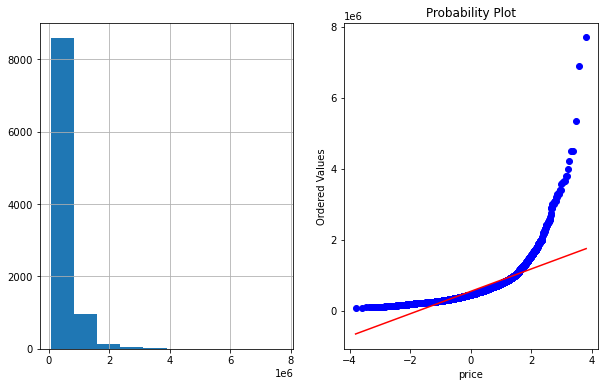

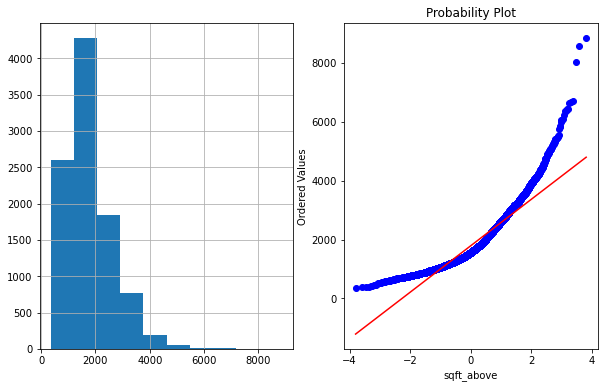

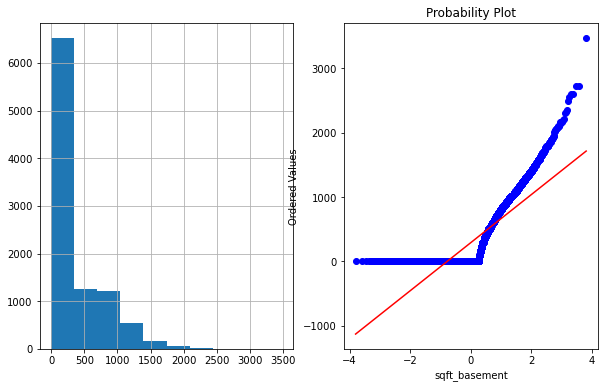

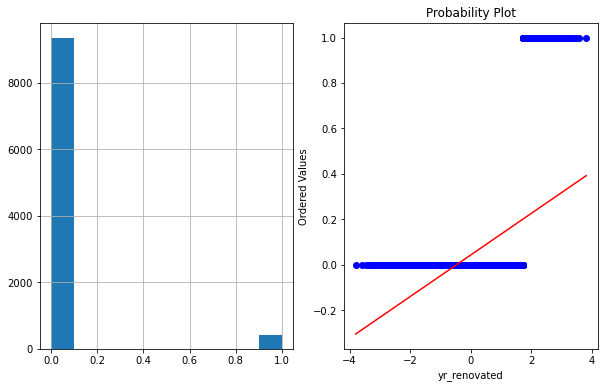

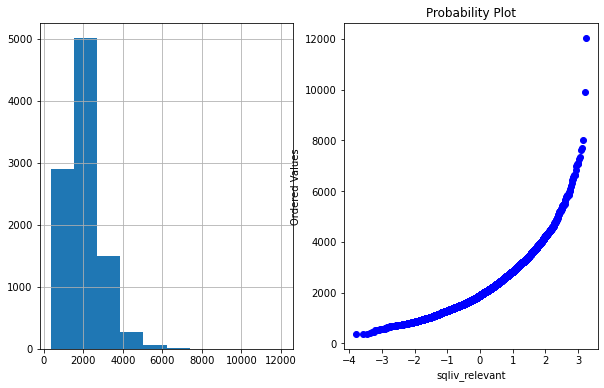

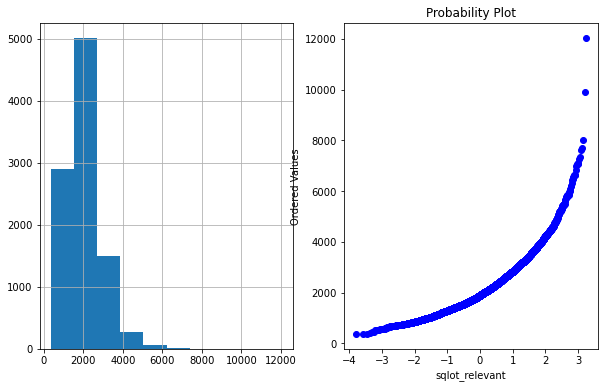

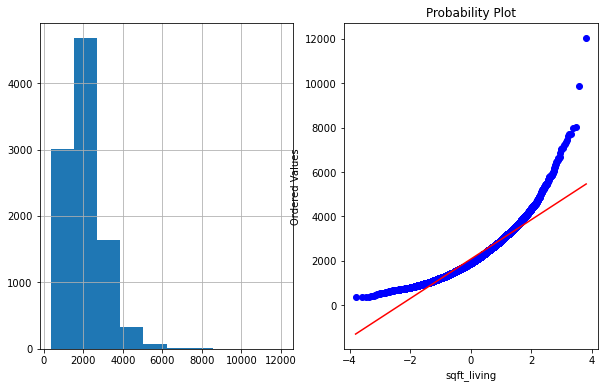

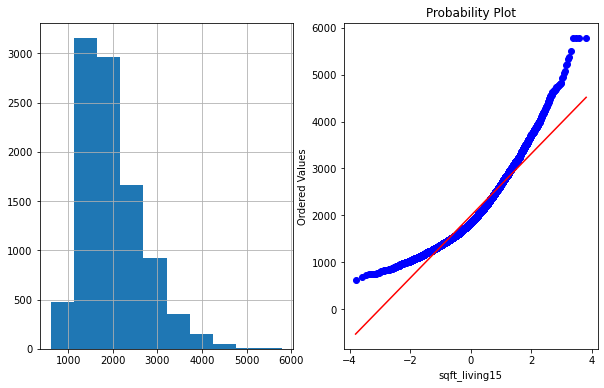

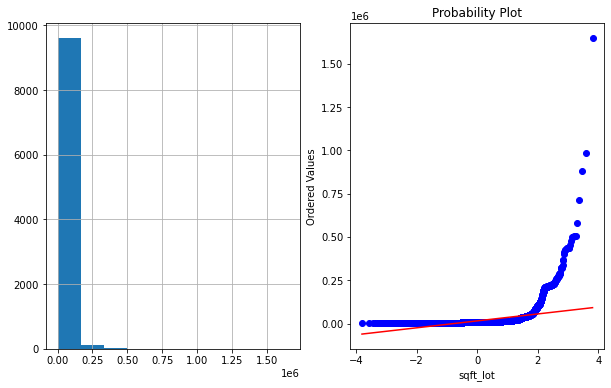

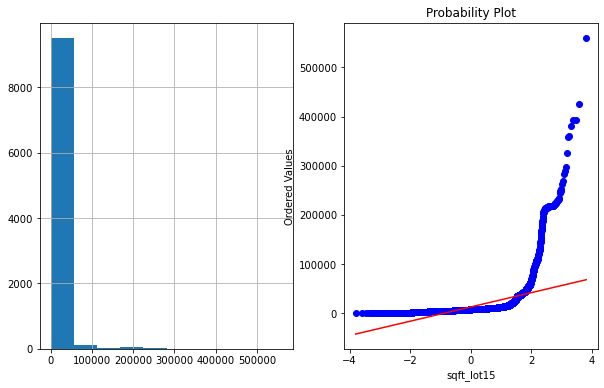

In [403]:
trans= ['price','sqft_above', 'sqft_basement',  'yr_renovated', 'sqliv_relevant', 'sqlot_relevant', "sqft_living", 'sqft_living15', 'sqft_lot', 'sqft_lot15' ]
for variable in trans:
    plot_data(data, variable)
#left side plot indicates initial distribution 
#right side will be probplot 

In [404]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sold', 'Age', 'sqliv_relevant',
       'sqlot_relevant'],
      dtype='object')

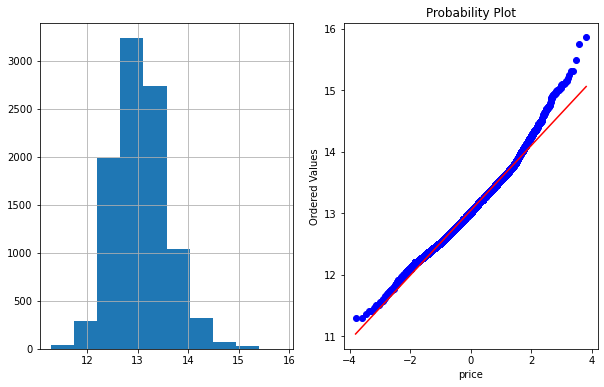

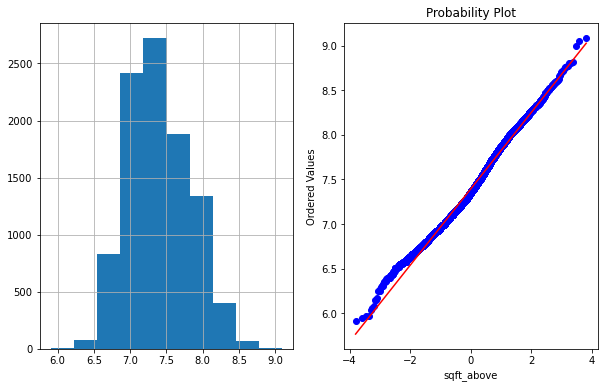

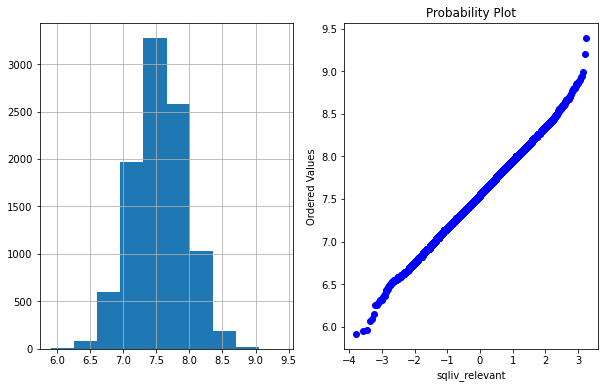

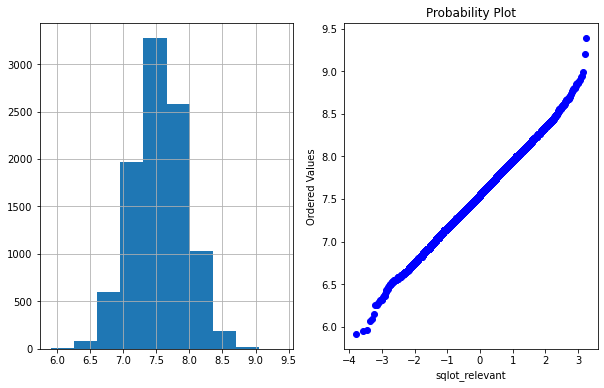

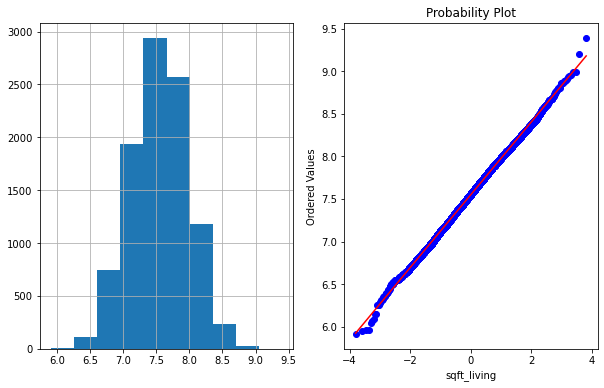

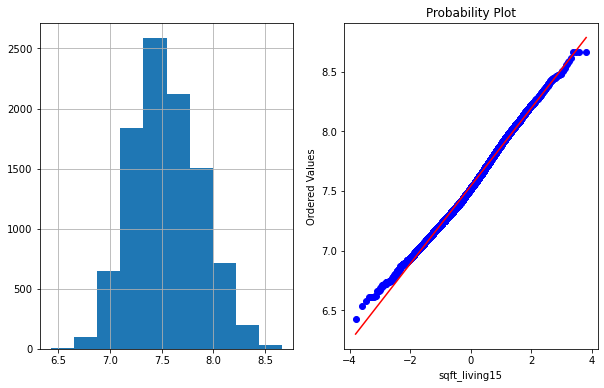

In [405]:
trans= ['price','sqft_above', 'sqft_basement',  'yr_renovated', 'sqliv_relevant', 'sqlot_relevant', "sqft_living", 'sqft_living15' ]
for variable in trans:
#     data1=data.copy()
    if 0 in data[variable].unique(): #because log of 0 is undefined
        pass
    else:
        data[variable]=np.log(data[variable])  #applying np.log on every feature(because right skewed)
        plot_data(data, variable)

##### 5. Basement Transformation

In [406]:
basement=[]
for i in data['sqft_basement']:
    if i==0:
        basement.append(0)
    else:
        basement.append(1)

In [407]:
data['basement']=pd.DataFrame(basement)
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,sqliv_relevant,sqlot_relevant,basement
0,2487200875,13.311329,4,3.00,7.580700,5000,1.0,0,0,5,...,98136,47.5208,-122.393,7.215240,5000,2014,49,7.580700,7.580700,1.0
1,7237550310,14.018451,4,4.50,8.597851,101930,1.0,0,0,3,...,98053,47.6561,-122.005,8.468003,101930,2014,13,8.597851,8.597851,1.0
2,9212900260,13.056224,2,1.00,7.056175,6000,1.0,0,0,4,...,98115,47.6900,-122.292,7.192934,6000,2014,72,7.056175,7.056175,1.0
3,114101516,12.644328,3,1.00,7.265430,19901,1.5,0,0,4,...,98028,47.7558,-122.229,7.484369,12697,2014,87,7.265430,7.265430,0.0
4,6054650070,12.899220,3,1.75,7.222566,9680,1.0,0,0,4,...,98074,47.6127,-122.045,7.222566,10208,2014,37,7.222566,7.222566,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,12.969212,3,2.00,7.306531,1126,3.0,0,0,3,...,98144,47.5699,-122.288,7.244228,1230,2015,1,NaN,NaN,NaN
9757,3448900210,13.322337,4,2.50,7.832014,6023,2.0,0,0,3,...,98056,47.5137,-122.167,7.832014,6023,2014,0,NaN,NaN,NaN
9758,7936000429,13.822983,4,3.50,8.163371,7200,2.0,0,0,3,...,98136,47.5537,-122.398,7.625595,6200,2015,6,NaN,NaN,NaN
9759,1523300141,12.904459,2,0.75,6.927558,1350,2.0,0,0,3,...,98144,47.5944,-122.299,6.927558,2007,2014,5,NaN,NaN,NaN


#### 6. Location Transformation

In [408]:
L=data[['price','zipcode']].groupby(['zipcode']).mean()
L=L.sort_values(by='price')
L=L.rank()
data=pd.merge(data,L,on='zipcode')
data.head()

,id,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,sqliv_relevant,sqlot_relevant,basement,price_y
0,2487200875,13.311329,4,3.00,7.580700,5000,1.0,0,0,5,...,47.5208,-122.393,7.215240,5000,2014,49,7.580700,7.580700,1.0,41.0
1,9169600135,13.171154,3,1.50,7.207860,6000,1.0,0,2,3,...,47.5275,-122.391,7.455877,6012,2014,64,7.207860,7.207860,1.0,41.0
2,9238901420,12.999065,3,1.00,7.081709,5100,1.0,0,0,4,...,47.5346,-122.385,7.432484,5100,2015,74,7.432484,7.432484,1.0,41.0
3,2490200320,13.208541,3,1.75,7.426549,6200,1.5,0,0,3,...,47.5338,-122.384,7.426549,5100,2015,99,7.426549,7.426549,0.0,41.0
4,2349300060,12.206073,4,2.00,7.560080,4822,1.0,0,0,2,...,47.5507,-122.381,7.021084,4822,2015,101,7.021084,7.021084,1.0,41.0


In [409]:
data=data.rename(columns={'price_x':'price'})
data=data.rename(columns={'price_y':'zip_rank by price'})
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,sqliv_relevant,sqlot_relevant,basement,zip_rank by price
0,2487200875,13.311329,4,3.00,7.580700,5000,1.0,0,0,5,...,47.5208,-122.393,7.215240,5000,2014,49,7.580700,7.580700,1.0,41.0
1,9169600135,13.171154,3,1.50,7.207860,6000,1.0,0,2,3,...,47.5275,-122.391,7.455877,6012,2014,64,7.207860,7.207860,1.0,41.0
2,9238901420,12.999065,3,1.00,7.081709,5100,1.0,0,0,4,...,47.5346,-122.385,7.432484,5100,2015,74,7.432484,7.432484,1.0,41.0
3,2490200320,13.208541,3,1.75,7.426549,6200,1.5,0,0,3,...,47.5338,-122.384,7.426549,5100,2015,99,7.426549,7.426549,0.0,41.0
4,2349300060,12.206073,4,2.00,7.560080,4822,1.0,0,0,2,...,47.5507,-122.381,7.021084,4822,2015,101,7.021084,7.021084,1.0,41.0


In [410]:
data=data.drop(['zipcode'],axis=1)

In [411]:
data=data.drop(['id'],axis=1)

#### Fitting model after Feature Engineering

In [556]:
#same features as we have taken before but here with log transformation
Y = data["price"]
X = data[["bedrooms","bathrooms","sqft_living","view", "grade", "sqft_above","sqft_basement",
        "sqft_living15", 'condition','Age','lat', 'yr_sold']]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)


reg = DecisionTreeRegressor() # default settings

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)

#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(y_pred) - np.exp(y_valid))**2)))/np.mean(np.exp(y_valid)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_pred)-np.exp(y_valid))))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_valid)-np.exp(y_pred)))/np.exp(y_valid))*100)

#calculating r2
r2=reg.score(X_valid, y_valid)
print("r2= ", r2)

#calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)

RMSE =  42.0
MAPE =  21.400022930161107
r2=  0.7118773740354772
Adjusted r2=  0.7104516125874054


In [152]:
#Great!! Considerable reduction in RMSE, MAPE 

In [564]:
# Relpacing sqft_living & sqft_living15 by sqft_relevant
Y = data["price"]
X = data[["bedrooms","bathrooms","sqliv_relevant","view", "grade", "sqft_above","sqft_basement",
         'condition','Age','lat', 'yr_sold']]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)


reg = DecisionTreeRegressor() # default settings

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)

#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(y_pred) - np.exp(y_valid))**2)))/np.mean(np.exp(y_valid)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_pred)-np.exp(y_valid))))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_valid)-np.exp(y_pred)))/np.exp(y_valid))*100)

#calculating r2
r2=reg.score(X_valid, y_valid)
print("r2= ", r2)

# calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)

RMSE =  43.0
MAPE =  22.47958530178945
r2=  0.6785464457537267
Adjusted r2=  0.6770889069669546


In [159]:
#Of no use. #considering sqft_living & sqft_living15 only
#if we want less number of variables then we can consider

In [572]:
# Relpacing sqft_basement by basement
Y = data["price"]
X = data[["bedrooms","bathrooms","sqft_living",'sqft_living15', "view", "grade", "sqft_above","basement",
         'condition','Age','lat', 'yr_sold']]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)


reg = DecisionTreeRegressor() # default settings

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)
#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(y_pred) - np.exp(y_valid))**2)))/np.mean(np.exp(y_valid)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_pred)-np.exp(y_valid))))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_valid)-np.exp(y_pred)))/np.exp(y_valid))*100)

#calculating r2
r2=reg.score(X_valid, y_valid)
print("r2= ", r2)

# calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)

RMSE =  36.0
MAPE =  20.557162476793074
r2=  0.715279909779006
Adjusted r2=  0.7138709856212114


In [161]:
#Basement feature is working

In [593]:
#Adding zip_rank by price feature instead of lat
Y = data["price"]
X = data[["bedrooms","bathrooms","sqft_living",'sqft_living15',"view", "grade", "sqft_above","basement",
         'condition','Age','lat', 'yr_sold', 'zip_rank by price']]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)


reg = DecisionTreeRegressor() # default settings

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)

#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(y_pred) - np.exp(y_valid))**2)))/np.mean(np.exp(y_valid)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_pred)-np.exp(y_valid))))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_valid)-np.exp(y_pred)))/np.exp(y_valid))*100)
#calculating r2
r2=reg.score(X_valid, y_valid)
print("r2= ", r2)

# calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)

RMSE =  34.0
MAPE =  19.48309878230175
r2=  0.750785765812434
Adjusted r2=  0.7494492208271046


In [163]:
#zip_rank feature is also working

In [581]:
#Trying to remove lat feature because we have added zip_rank
Y = data["price"]
X = data[["bedrooms","bathrooms","sqft_living",'sqft_living15',"view", "grade", "sqft_above","basement",
         'condition','Age', 'yr_sold', 'zip_rank by price']]

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)


reg = DecisionTreeRegressor() # default settings

reg.fit(X_train,y_train)

#predicting values for y_valid
y_pred = reg.predict(X_valid)
#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(y_pred) - np.exp(y_valid))**2)))/np.mean(np.exp(y_valid)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_pred)-np.exp(y_valid))))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_valid)-np.exp(y_pred)))/np.exp(y_valid))*100)
#calculating r2
r2=reg.score(X_valid, y_valid)
print("r2= ", r2)

# calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)

RMSE =  39.0
MAPE =  20.62337877387788
r2=  0.7277571427208241
Adjusted r2=  0.7264099615714015


In [165]:
#We should consider lat also

##### Using cross validation to choose best value of depth

In [497]:
X_train = data[["bedrooms","bathrooms","sqft_living",'sqft_living15',"view", "grade", "sqft_above","basement",
         'condition','Age','lat', 'yr_sold', 'zip_rank by price']]
y_train = data.price

In [498]:
depth = np.arange(1,15) #depth in range of 1 to 15
cv_scores = [] #empty list that will hold cv_scores

# performing 10-fold cross validation
for k in depth: #for each depth in depth from 1 to 15
    reg_tree = DecisionTreeRegressor(max_depth=k) #regression tree model
    score= cross_val_score(reg_tree, X_train, y_train, cv=10, scoring ="neg_mean_squared_error" ) #10 fold cross validation
    #used mean squared error, mse as a scoring metric 
    cv_scores.append(score.mean()) #appending mean of all scores for specific cross validation in cv_scores

In [499]:
#Calculating RMSE
RMSE= [np.sqrt(-score) for score in cv_scores]  #used -score because mse retuen negative value 
RMSE

[0.4219116694997188,
 0.34022687082559344,
 0.3034335374796219,
 0.28541961702619595,
 0.2701225688831585,
 0.2567288877069561,
 0.25517215312890446,
 0.25597574749146496,
 0.2545139277079755,
 0.2599091058595977,
 0.26596491116623755,
 0.2695698906680497,
 0.27454618294623434,
 0.27924527017575357]

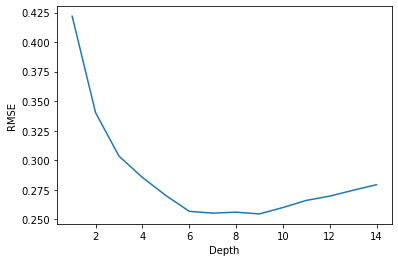

In [500]:
# plot RMSE vs depth
plt.plot(depth, RMSE)
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.show()

In [170]:
# choosing depth as 6,7,8

###### Final Testing

In [505]:
#Read the house_price test data
df_test = pd.read_csv("kc_house_test_data.csv")

In [506]:
#for date variables:
#date column conversion
df_test["date"] = df_test["date"].str.slice(0, 8) # striped only date part 
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y%m%d') #converted date string into date
df_test['yr_sold'] = pd.DatetimeIndex(df_test['date']).year #extracting year from date for future references
df_test.head() #display data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015
1,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0,0,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,2015
2,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0,0,...,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,2014
3,461000390,2014-06-24,687500.0,4,1.75,2330,5000,1.5,0,0,...,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,2014
4,7895500070,2015-02-13,240000.0,4,1.00,1220,8075,1.0,0,0,...,890,330,1969,0,98001,47.3341,-122.282,1290,7800,2015


In [507]:
#Doing Feature engineering as we have performed for train data
# data=df.copy()
df_test["Age"]= df_test['yr_sold']-df_test['yr_built']
df_test.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age
0,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,0,2003,0,98038,47.3684,-122.031,2390,7570,2015,12
1,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0,0,...,0,1900,0,98107,47.6700,-122.394,1360,4850,2015,115
2,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0,0,...,0,1921,0,98002,47.3089,-122.210,1060,5095,2014,93
3,461000390,2014-06-24,687500.0,4,1.75,2330,5000,1.5,0,0,...,820,1929,0,98117,47.6823,-122.368,1460,5000,2014,85
4,7895500070,2015-02-13,240000.0,4,1.00,1220,8075,1.0,0,0,...,330,1969,0,98001,47.3341,-122.282,1290,7800,2015,46


In [508]:
basement=[]
for i in df_test['sqft_basement']:
    if i==0:
        basement.append(0)
    else:
        basement.append(1)

In [509]:
df_test['basement']=pd.DataFrame(basement)
df_test

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,basement
0,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,2003,0,98038,47.3684,-122.031,2390,7570,2015,12,0
1,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0,0,...,1900,0,98107,47.6700,-122.394,1360,4850,2015,115,0
2,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0,0,...,1921,0,98002,47.3089,-122.210,1060,5095,2014,93,0
3,461000390,2014-06-24,687500.0,4,1.75,2330,5000,1.5,0,0,...,1929,0,98117,47.6823,-122.368,1460,5000,2014,85,1
4,7895500070,2015-02-13,240000.0,4,1.00,1220,8075,1.0,0,0,...,1969,0,98001,47.3341,-122.282,1290,7800,2015,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,6669080120,2014-12-15,405000.0,4,2.50,1980,5020,2.0,0,0,...,2007,0,98056,47.5147,-122.190,1980,5064,2014,7,0
2213,2855000110,2014-08-08,388000.0,3,2.50,2198,6222,2.0,0,2,...,2010,0,98198,47.3906,-122.304,2198,7621,2014,4,0
2214,3345700207,2015-05-02,608500.0,4,3.50,2850,5577,2.0,0,0,...,2014,0,98056,47.5252,-122.192,2850,5708,2015,1,1
2215,6056111067,2014-07-07,230000.0,3,1.75,1140,1201,2.0,0,0,...,2014,0,98108,47.5637,-122.295,1210,1552,2014,0,0


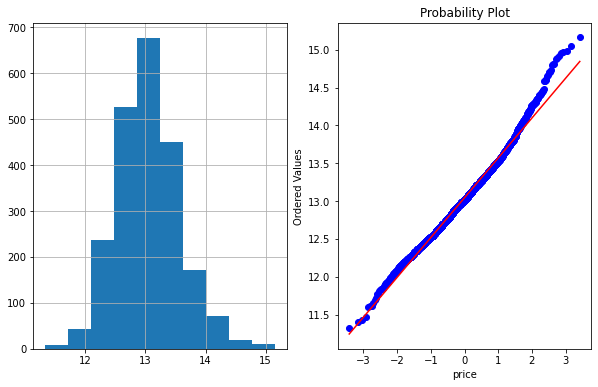

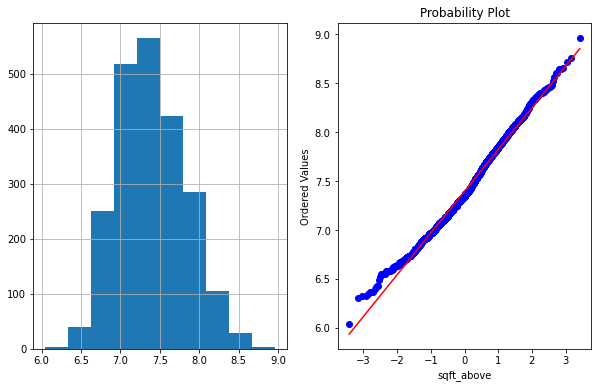

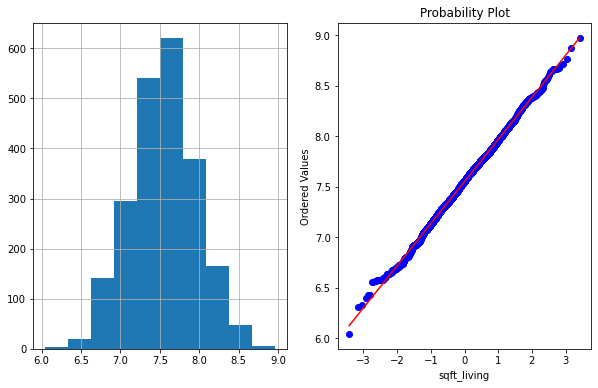

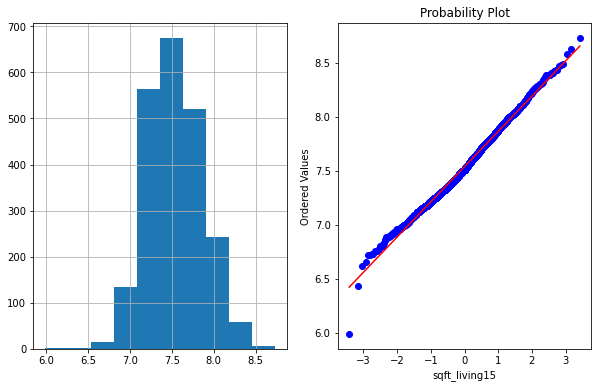

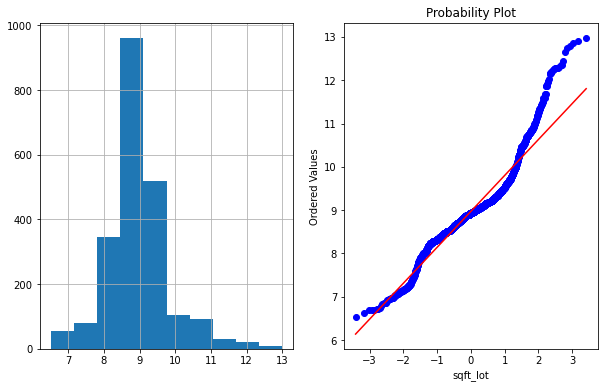

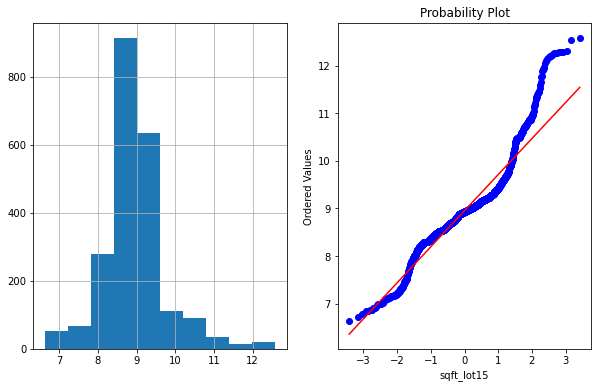

In [510]:
trans= ['price','sqft_above', 'sqft_basement',  'yr_renovated', "sqft_living", 'sqft_living15', 'sqft_lot', 'sqft_lot15' ]
for variable in trans:
#     data1=data.copy()
    if 0 in df_test[variable].unique(): #because log of 0 is undefined
        pass
    else:
        df_test[variable]=np.log(df_test[variable])  #applying np.log on every feature(because right skewed)
        plot_data(df_test, variable)

In [511]:
L=df_test[['price','zipcode']].groupby(['zipcode']).mean()
L=L.sort_values(by='price')
L=L.rank()
df_test=pd.merge(df_test,L,on='zipcode')
df_test.head()

,id,date,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,basement,price_y
0,3793500160,2015-03-12,12.685408,3,2.5,7.544332,8.788746,2.0,0,0,...,0,98038,47.3684,-122.031,7.779049,8.931948,2015,12,0,20.0
1,5416510830,2014-08-06,12.611538,4,2.5,7.554859,8.489205,2.0,0,0,...,0,98038,47.3607,-122.034,7.605890,8.535230,2014,9,0,20.0
2,1545808560,2015-04-03,12.409013,3,2.5,7.333023,9.047821,1.0,0,0,...,0,98038,47.3592,-122.046,7.522941,9.004545,2015,19,1,20.0
3,4123840310,2015-01-06,12.744027,3,2.5,7.501082,8.554874,2.0,0,0,...,0,98038,47.3724,-122.042,7.501082,8.732305,2015,22,0,20.0
4,2322069114,2014-10-10,12.569510,3,1.0,6.956545,9.683464,1.0,0,0,...,1981,98038,47.3841,-122.006,7.383989,10.225571,2014,54,0,20.0


In [512]:
df_test=df_test.rename(columns={'price_x':'price'})
df_test=df_test.rename(columns={'price_y':'zip_rank by price'})
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,basement,zip_rank by price
0,3793500160,2015-03-12,12.685408,3,2.5,7.544332,8.788746,2.0,0,0,...,0,98038,47.3684,-122.031,7.779049,8.931948,2015,12,0,20.0
1,5416510830,2014-08-06,12.611538,4,2.5,7.554859,8.489205,2.0,0,0,...,0,98038,47.3607,-122.034,7.605890,8.535230,2014,9,0,20.0
2,1545808560,2015-04-03,12.409013,3,2.5,7.333023,9.047821,1.0,0,0,...,0,98038,47.3592,-122.046,7.522941,9.004545,2015,19,1,20.0
3,4123840310,2015-01-06,12.744027,3,2.5,7.501082,8.554874,2.0,0,0,...,0,98038,47.3724,-122.042,7.501082,8.732305,2015,22,0,20.0
4,2322069114,2014-10-10,12.569510,3,1.0,6.956545,9.683464,1.0,0,0,...,1981,98038,47.3841,-122.006,7.383989,10.225571,2014,54,0,20.0


In [513]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sold', 'Age', 'sqliv_relevant',
       'sqlot_relevant', 'basement', 'zip_rank by price'],
      dtype='object')

In [595]:
# #Separating predictors & target
y_test = df_test["price"]
X_test = df_test[["bedrooms","bathrooms","sqft_living", 'sqft_living15',"view", "grade", "sqft_above","basement",
         'condition','Age', 'lat','yr_sold', 'zip_rank by price']]

reg = DecisionTreeRegressor(max_depth=6) 

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_test)

#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(y_pred) - np.exp(y_test))**2)))/np.mean(np.exp(y_test)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_pred)-np.exp(y_test))))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_test)-np.exp(y_pred)))/np.exp(y_test))*100)

#calculating r2
r2=reg.score(X_test, y_test)
print("r2= ", r2)

# calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)

RMSE =  33.0
MAPE =  18.80080826791303
r2=  0.7884602849915907
Adjusted r2=  0.787325789820341


In [181]:
# Great we are getting more r2 & adjusted r2 on test data. 
#Also, MAPE & RMSE both are less on test data
#We can say that our model is generalized

In [596]:
#max_depth=7
reg = DecisionTreeRegressor(max_depth=7) 

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_test)
#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(y_pred) - np.exp(y_test))**2)))/np.mean(np.exp(y_test)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_pred)-np.exp(y_test))))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_test)-np.exp(y_pred)))/np.exp(y_test))*100)

#calculating r2
r2=reg.score(X_test, y_test)
print("r2= ", r2)

# calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)

RMSE =  32.0
MAPE =  18.13732942718181
r2=  0.8043458489130559
Adjusted r2=  0.8032965485978207


In [597]:
#max_depth=8
reg = DecisionTreeRegressor(max_depth=8) 

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_test)

#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(y_pred) - np.exp(y_test))**2)))/np.mean(np.exp(y_test)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_pred)-np.exp(y_test))))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_test)-np.exp(y_pred)))/np.exp(y_test))*100)

#calculating r2
r2=reg.score(X_test, y_test)
print("r2= ", r2)

# calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)

RMSE =  30.0
MAPE =  18.017138708642424
r2=  0.8066042366190388
Adjusted r2=  0.8055670481190584


In [184]:
#best depth=8

##### Tunining min_samples_leaf

In [598]:
leaf = np.arange(1,15) #depth in range of 1 to 15
cv_scores = [] #empty list that will hold cv_scores

# performing 10-fold cross validation
for leaf in leaf: #for each depth in depth from 1 to 15
    reg_tree = DecisionTreeRegressor(max_depth=8,min_samples_leaf=leaf) #regression tree model
    score= cross_val_score(reg_tree, X_train, y_train, cv=10, scoring ="neg_mean_squared_error" ) #10 fold cross validation
    #used mean squared error, mse as a scoring metric 
    cv_scores.append(score.mean()) #appending mean of all scores for specific cross validation in cv_scores

In [599]:
#Calculating RMSE
RMSE= [np.sqrt(-score) for score in cv_scores]  #used -score because mse retuen negative value 
RMSE

[0.22620078094267132,
 0.2244355408434583,
 0.22442634597332994,
 0.2244535456168762,
 0.2250089397371058,
 0.22371015122479454,
 0.22336894642208086,
 0.22326955323504977,
 0.22326115315610584,
 0.22339350974130331,
 0.22337521026582915,
 0.22352703057018256,
 0.22310375967783366,
 0.2227013219786389]

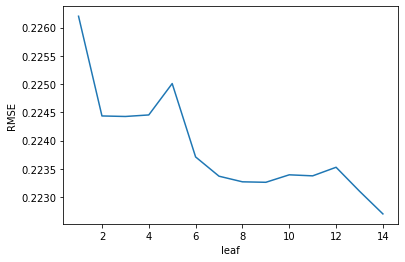

In [600]:
# plot RMSE vs depth
plt.plot(depth, RMSE)
plt.xlabel('leaf')
plt.ylabel('RMSE')
plt.show()

In [601]:
# #Separating predictors & target
y_test = df_test["price"]
X_test = df_test[["bedrooms","bathrooms","sqft_living", 'sqft_living15',"view", "grade", "sqft_above","basement",
         'condition','Age', 'lat','yr_sold', 'zip_rank by price']]

reg = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10) 

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_test)

#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(y_pred) - np.exp(y_test))**2)))/np.mean(np.exp(y_test)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_pred)-np.exp(y_test))))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_test)-np.exp(y_pred)))/np.exp(y_test))*100)

#calculating r2
r2=reg.score(X_test, y_test)
print("r2= ", r2)

# calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)

RMSE =  31.0
MAPE =  17.960648618452275
r2=  0.809066704019779
Adjusted r2=  0.8080427218218653


In [602]:
#min_samples_leaf=11
reg = DecisionTreeRegressor(max_depth=8,min_samples_leaf=11 ) 

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_test)
#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(y_pred) - np.exp(y_test))**2)))/np.mean(np.exp(y_test)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_pred)-np.exp(y_test))))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_test)-np.exp(y_pred)))/np.exp(y_test))*100)


#calculating r2
r2=reg.score(X_test, y_test)
print("r2= ", r2)

# calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)

RMSE =  31.0
MAPE =  18.000074712478078
r2=  0.8091975463202471
Adjusted r2=  0.8081742658343408


In [757]:
#min_samples_leaf=12
reg = DecisionTreeRegressor(max_depth=8,min_samples_leaf=12 ) 

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_test)

#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(y_pred) - np.exp(y_test))**2)))/np.mean(np.exp(y_test)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_pred)-np.exp(y_test))))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_test)-np.exp(y_pred)))/np.exp(y_test))*100)

#calculating r2
r2=reg.score(X_test, y_test)
print("r2= ", r2)

# calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)

RMSE =  31.0
MAPE =  17.93501480737066
r2=  0.810069690776664
Adjusted r2=  0.8090510876331396


In [750]:
#min_samples_leaf=12
reg = DecisionTreeRegressor(max_depth=8,min_samples_leaf=12 ) 

reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_test)

#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean(((y_pred) - (y_test))**2)))/np.mean((y_test)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_pred)-np.exp(y_test))))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_test)-np.exp(y_pred)))/np.exp(y_test))*100)

#calculating r2
r2=reg.score(X_test, y_test)
print("r2= ", r2)

# calculating adjusted r2
n=X_valid.shape[0] #no of predictors
p=X_valid.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))

print("Adjusted r2= ", adjusted_r2)

RMSE =  2.0
MAPE =  17.935014807370653
r2=  0.8100696907766642
Adjusted r2=  0.8090510876331397


min_sample leaf of 12 outperform 11

#### Hence with Decision Tree model our output is:
    RMSE =  2.0
    MAPE =  17.935014807370653
    r2=  0.8100696907766642
    Adjusted r2=  0.8090510876331397

### Linear Regression

#### model with features from our EDA analysis

In [618]:
# #Separating predictors & target
X_train_l = data[["bedrooms","bathrooms","sqft_living","sqft_living15",'sqliv_relevant', "view", "grade", "sqft_above","sqft_basement",
         'condition','Age','lat', 'yr_sold', 'zip_rank by price']]

In [619]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sold', 'Age', 'sqliv_relevant',
       'sqlot_relevant', 'basement', 'zip_rank by price'],
      dtype='object')

In [620]:
y_train_l = data["price"]
y_train_l

0       13.311329
1       13.171154
2       12.999065
3       13.208541
4       12.206073
          ...    
9751    14.714859
9752    14.159100
9753    15.106120
9754    14.483340
9755    14.880221
Name: price, Length: 9751, dtype: float64

##### 1. checking linear relation between x & Y 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


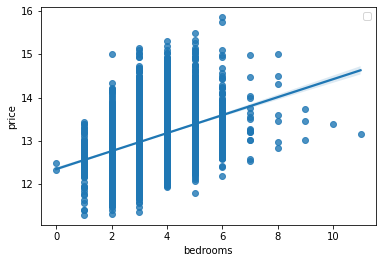

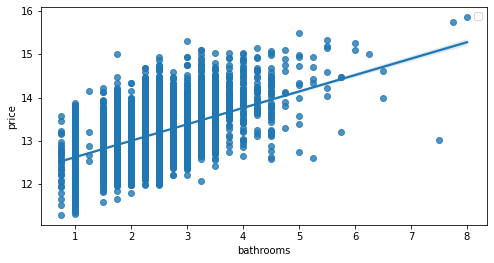

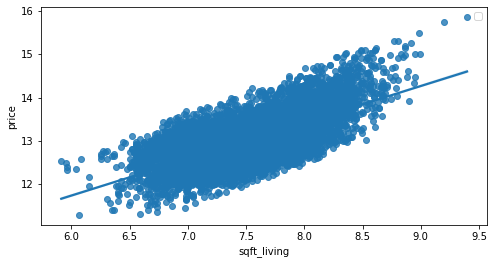

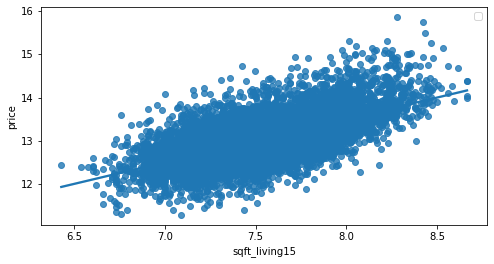

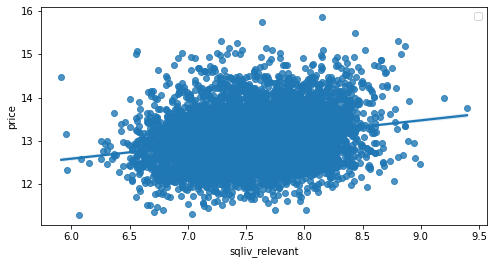

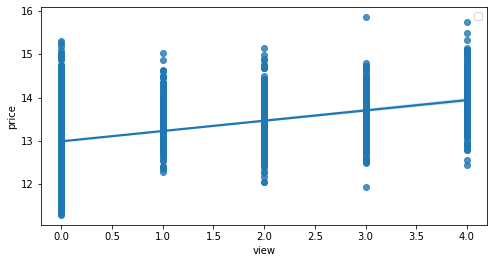

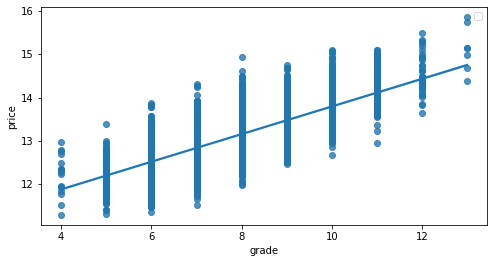

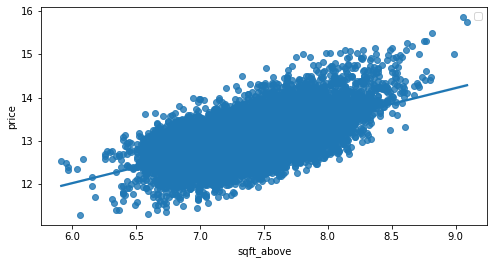

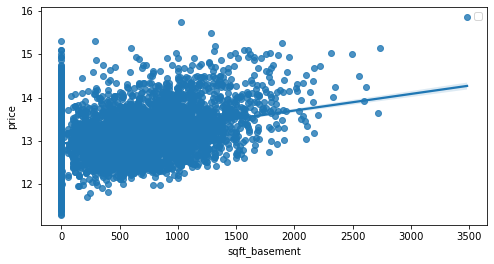

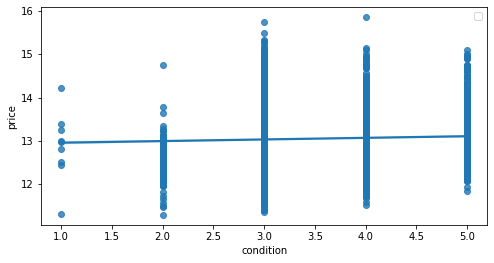

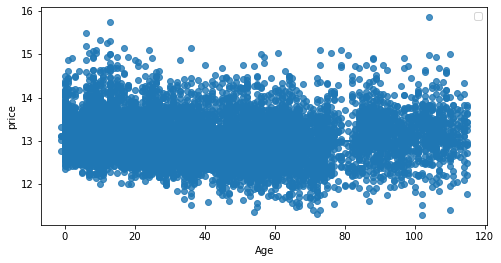

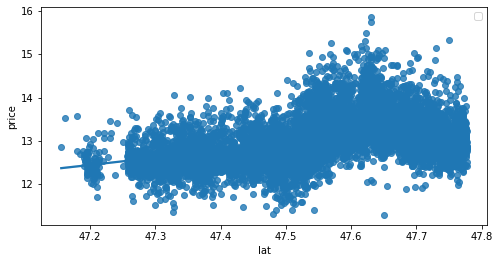

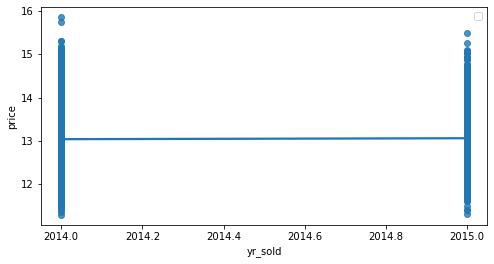

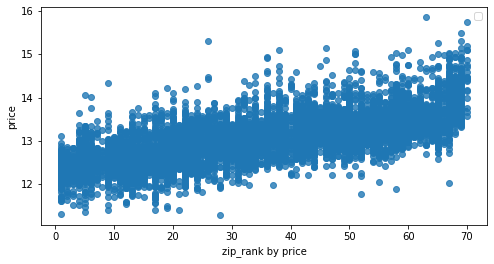

<Figure size 576x288 with 0 Axes>

In [621]:
for variable in X_train_l:
    sns.regplot(x= variable, y=data['price'], data=X_train_l)
    plt.legend(loc=(0))
    plt.figure(figsize=(8, 4))

In [622]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [623]:
#Performing standardScaling transformation
data1=X_train_l.copy()
# df_x=data1.drop(['price'],axis=1)
# df_x

In [624]:
x=data1.copy()
arr= scaler.fit_transform(x)
arr

array([[ 0.68722679,  1.14113623,  0.0662247 , ..., -0.27977913,
        -0.68013004,  0.30178854],
       [-0.41132214, -0.79999641, -0.80489036, ..., -0.23201752,
        -0.68013004,  0.30178854],
       [-0.41132214, -1.44704063, -1.09963427, ..., -0.18140446,
         1.47030706,  0.30178854],
       ...,
       [ 1.78577572,  5.02340151,  2.47271185, ...,  0.40242781,
        -0.68013004,  1.81942017],
       [ 0.68722679,  1.78818044,  1.7705801 , ...,  0.43379364,
        -0.68013004,  1.81942017],
       [ 1.78577572,  2.43522465,  2.34141708, ...,  0.35751763,
        -0.68013004,  1.81942017]])

In [625]:
x=pd.DataFrame(arr)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.687227,1.141136,0.066225,-1.000164,0.075989,-0.314999,-0.560627,-1.023679,1.392437,2.436669,0.186741,-0.279779,-0.680130,0.301789
1,-0.411322,-0.799996,-0.804890,-0.264692,-0.859804,2.222426,-0.560627,-1.382311,0.353320,-0.639851,0.699820,-0.232018,-0.680130,0.301789
2,-0.411322,-1.447041,-1.099634,-0.336189,-0.296019,-0.314999,-0.560627,-1.068421,-0.301776,0.898409,1.041872,-0.181404,1.470307,0.301789
3,-0.411322,-0.476474,-0.293938,-0.354327,-0.310915,-0.314999,-0.560627,0.069784,-0.663208,-0.639851,1.897002,-0.187107,1.470307,0.301789
4,0.687227,-0.152952,0.018049,-1.593574,-1.328594,-0.314999,-1.407911,-1.331177,1.595742,-2.178111,1.965413,-0.066634,1.470307,0.301789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9746,0.687227,4.052835,2.867274,0.565594,0.176399,-0.314999,2.828508,2.689448,2.318606,-0.639851,-1.044647,0.501515,-0.680130,1.819420
9747,0.687227,0.170570,1.247783,1.303633,-1.563335,-0.314999,1.133940,1.604950,-0.663208,-0.639851,-0.292132,0.522901,-0.680130,1.819420
9748,1.785776,5.023402,2.472712,1.324711,-0.208455,-0.314999,3.675791,2.824671,-0.663208,-0.639851,-1.181468,0.402428,-0.680130,1.819420
9749,0.687227,1.788180,1.770580,1.488301,1.321999,-0.314999,1.981224,2.125524,-0.663208,0.898409,-0.565774,0.433794,-0.680130,1.819420


##### 2 Checking Multicollinearity using VIF(1/(1-r2))

In [626]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [627]:
arr.shape #to know columns

(9751, 14)

In [628]:
arr.shape[1] #to extract number of columns

14

In [629]:
VIF=[]
for i in range (arr.shape[1]):
    VIF.append(variance_inflation_factor(arr,i))
VIF

[1.8473845167780647,
 3.0236854048280697,
 34.94535192009971,
 2.7155664211469936,
 1.1034504988093417,
 1.234564898334171,
 3.292194857990894,
 28.528726186122768,
 8.782704178291121,
 1.200226556522097,
 1.8667339902744557,
 1.7811212984968048,
 1.0037877589628759,
 2.09581545558324]

In [630]:
vif_df= pd.DataFrame() #creating dataframe vif
vif_df['vif']=VIF
vif_df['feature']=data1.columns
vif_df

,vif,feature
0,1.847385,bedrooms
1,3.023685,bathrooms
2,34.945352,sqft_living
3,2.715566,sqft_living15
4,1.103450,sqliv_relevant
5,1.234565,view
6,3.292195,grade
7,28.528726,sqft_above
8,8.782704,sqft_basement
9,1.200227,condition


In [631]:
#We do have multicollinearity

In [632]:
#dropping sqft_living as we have sqlive_relevant
data1=data1.drop(['sqft_living'],axis=1)
data1=data1.drop(['sqft_living15'],axis=1)
x=data1.copy()
arr= scaler.fit_transform(x)
arr
x=pd.DataFrame(arr)
VIF=[]
for i in range (arr.shape[1]):
    VIF.append(variance_inflation_factor(arr,i))
vif_df= pd.DataFrame() #creating dataframe vif
vif_df['vif']=VIF
vif_df['feature']=data1.columns
vif_df

,vif,feature
0,1.809437,bedrooms
1,2.989597,bathrooms
2,1.097658,sqliv_relevant
3,1.192677,view
4,3.179649,grade
5,4.066124,sqft_above
6,1.756680,sqft_basement
7,1.197712,condition
8,1.855251,Age
9,1.761888,lat


In [633]:
# Now, we don't have hard multicollinearity as VIF of all features is less than 10

In [634]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [635]:
lr.fit(x,y_train_l)

LinearRegression()

In [636]:
y_pred= lr.predict(x)

In [641]:
#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(y_pred) - np.exp(y_train_l))**2)))/np.mean(np.exp(y_train_l)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_pred)-np.exp(y_test))))

#mse on train data
# mse=cross_val_score(lr, x, y_train_l, scoring= 'neg_mean_squared_error', cv=10)
# print("MSE= ", np.mean(mse))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_train_l)-np.exp(y_pred)))/np.exp(y_train_l))*100)

#r2 on train data
r2=cross_val_score(lr, x, y_train_l, scoring= 'r2', cv=10)
print("R2= ",np.mean(r2))
n=x.shape[0] #no of predictors
p=x.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))
print('adjusted_r2= ',np.mean(adjusted_r2))

RMSE =  31.0
MAPE =  16.03003071962561
R2=  0.8146054605888743
adjusted_r2=  0.8143770015138143


### Using backward elimination for Feature elimination

Assumptions

1. No missing values in dataset
2. Low correlation between the independent variables  ---checked already

In [642]:
#checking missing values
print(data.isnull().sum()) 

price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
yr_sold              0
Age                  0
sqliv_relevant       0
sqlot_relevant       0
basement             0
zip_rank by price    0
dtype: int64


In [645]:
y_train_b= data["price"]
X_train_b=data.drop(['price'], axis=1)

In [646]:
#Performing standardScaling transformation
datab=X_train_b.copy()

In [647]:
xb=datab.copy()
arrb= scaler.fit_transform(xb)
arrb

array([[ 0.68722679,  1.14113623,  0.0662247 , ...,  0.07598913,
         1.24684564,  0.30178854],
       [-0.41132214, -0.79999641, -0.80489036, ..., -0.8598039 ,
         1.24684564,  0.30178854],
       [-0.41132214, -1.44704063, -1.09963427, ..., -0.29601895,
         1.24684564,  0.30178854],
       ...,
       [ 1.78577572,  5.02340151,  2.47271185, ..., -0.20845521,
        -0.8020239 ,  1.81942017],
       [ 0.68722679,  1.78818044,  1.7705801 , ...,  1.32199901,
         1.24684564,  1.81942017],
       [ 1.78577572,  2.43522465,  2.34141708, ..., -0.64606581,
         1.24684564,  1.81942017]])

In [648]:
xb=pd.DataFrame(arrb)
xb

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.687227,1.141136,0.066225,-0.247605,-0.912660,-0.092091,-0.314999,2.436669,-0.560627,-1.023679,...,-0.279779,-1.277512,-1.000164,-0.295090,-0.680130,0.186741,0.075989,0.075989,1.246846,0.301789
1,-0.411322,-0.799996,-0.804890,-0.223383,-0.912660,-0.092091,2.222426,-0.639851,-0.560627,-1.382311,...,-0.232018,-1.263209,-0.264692,-0.256942,-0.680130,0.699820,-0.859804,-0.859804,1.246846,0.301789
2,-0.411322,-1.447041,-1.099634,-0.245183,-0.912660,-0.092091,-0.314999,0.898409,-0.560627,-1.068421,...,-0.181404,-1.220300,-0.336189,-0.291320,1.470307,1.041872,-0.296019,-0.296019,1.246846,0.301789
3,-0.411322,-0.476474,-0.293938,-0.218538,0.026982,-0.092091,-0.314999,-0.639851,-0.560627,0.069784,...,-0.187107,-1.213148,-0.354327,-0.291320,1.470307,1.897002,-0.310915,-0.310915,-0.802024,0.301789
4,0.687227,-0.152952,0.018049,-0.251916,-0.912660,-0.092091,-0.314999,-2.178111,-1.407911,-1.331177,...,-0.066634,-1.191694,-1.593574,-0.301800,1.470307,1.965413,-1.328594,-1.328594,1.246846,0.301789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9746,0.687227,4.052835,2.867274,-0.005721,0.966623,-0.092091,-0.314999,-0.639851,2.828508,2.689448,...,0.501515,-0.154731,0.565594,-0.177517,-0.680130,-1.044647,0.176399,0.176399,1.246846,1.819420
9747,0.687227,0.170570,1.247783,0.035408,0.966623,-0.092091,-0.314999,-0.639851,1.133940,1.604950,...,0.522901,-0.104671,1.303633,0.154506,-0.680130,-0.292132,-1.563335,-1.563335,-0.802024,1.819420
9748,1.785776,5.023402,2.472712,0.113234,0.966623,-0.092091,-0.314999,-0.639851,3.675791,2.824671,...,0.402428,-0.154731,1.324711,0.179875,-0.680130,-1.181468,-0.208455,-0.208455,-0.802024,1.819420
9749,0.687227,1.788180,1.770580,0.084555,0.966623,-0.092091,-0.314999,0.898409,1.981224,2.125524,...,0.433794,-0.161882,1.488301,0.221830,-0.680130,-0.565774,1.321999,1.321999,1.246846,1.819420


##### 2 Checking Multicollinearity using VIF(1/(1-r2))

In [649]:
VIF=[]
for i in range (arrb.shape[1]):
    VIF.append(variance_inflation_factor(arrb,i))
VIF

C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[1.8697641642114278,
 3.290259865819692,
 35.25021995269457,
 2.1157851805628245,
 2.070647921740282,
 1.2044490724025396,
 1.456302336427545,
 1.2478034779683642,
 3.4582125416863856,
 29.661175362063585,
 8.856652962062658,
 inf,
 1.1490428421776884,
 1.848164781463623,
 1.5938953308986066,
 2.8816676864692505,
 2.1472996203178107,
 inf,
 inf,
 15961935.43576452,
 15961935.43576452,
 1.1487888782328624,
 2.2498717238330093]

In [650]:
vif_df= pd.DataFrame() #creating dataframe vif
vif_df['vif']=VIF
vif_df['feature']=datab.columns
vif_df

,vif,feature
0,1.869764e+00,bedrooms
1,3.290260e+00,bathrooms
2,3.525022e+01,sqft_living
3,2.115785e+00,sqft_lot
4,2.070648e+00,floors
5,1.204449e+00,waterfront
6,1.456302e+00,view
7,1.247803e+00,condition
8,3.458213e+00,grade
9,2.966118e+01,sqft_above


In [651]:
#we do have multicollinearity

In [652]:
datab.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sold', 'Age', 'sqliv_relevant',
       'sqlot_relevant', 'basement', 'zip_rank by price'],
      dtype='object')

In [653]:
#dropping sqft_living, sqft_living15 yr_built, sqlot_relavant
datab=datab.drop(['sqft_living'],axis=1)
datab=datab.drop(['sqft_living15'],axis=1)
datab=datab.drop(['yr_built'],axis=1)
datab=datab.drop(['sqlot_relevant'],axis=1)
xb=datab.copy()
arrb= scaler.fit_transform(xb)
arrb
xb=pd.DataFrame(arrb)
VIF=[]
for i in range (arrb.shape[1]):
    VIF.append(variance_inflation_factor(arrb,i))
vif_df= pd.DataFrame() #creating dataframe vif
vif_df['vif']=VIF
vif_df['feature']=datab.columns
vif_df

,vif,feature
0,1.831888,bedrooms
1,3.271441,bathrooms
2,2.109495,sqft_lot
3,2.025445,floors
4,1.204282,waterfront
5,1.405870,view
6,1.243828,condition
7,3.294546,grade
8,4.580900,sqft_above
9,2.004520,sqft_basement


In [654]:
#Now we don't have multicollinearity

In [655]:
X_train_b=datab.copy()

In [656]:
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = y_train_b, exog = X_train_b).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.127e+06
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                        0.00
Time:                        01:52:08   Log-Likelihood:                          1730.0
No. Observations:                9751   AIC:                                     -3422.
Df Residuals:                    9732   BIC:                                     -3286.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bedrooms             -0.0077      0.003     -2.512      0.012      -0.014      -0.002
bathrooms             0.0572      0.005     11.908      0.000       0.048       0.067
sqft_lot           7.247e-07   7.23e-08     10.029      0.000    5.83e-07    8.66e-07
floors                0.0091      0.005      1.655      0.098      -0.002       0.020
waterfront            0.4155      0.025     16.835      0.000       0.367       0.464
view                  0.0628      0.003     20.320      0.000       0.057       0.069
condition             0.0372      0.004     10.582      0.000       0.030       0.044
grade                 0.1176      0.003     37.266      0.000       0.111       0.124
sqft_above            0.3830      0.010     37.565      0.000       0.363       0.403
sqft_basement         0.0002   6.57e-06     22.906      0.000       0.000       0.000
yr_renovated          0.0335      0.011      3.103      0.002       0.012       0.055
lat                   0.3764      0.020     18.994      0.000       0.338       0.415
long                 -0.3101      0.018    -17.399      0.000      -0.345      -0.275
sqft_lot15        -7.556e-08   1.13e-07     -0.668      0.504   -2.97e-07    1.46e-07
yr_sold              -0.0235      0.001    -21.476      0.000      -0.026      -0.021
Age                   0.0021      0.000     19.673      0.000       0.002       0.002
sqliv_relevant        0.0032      0.006      0.576      0.565      -0.008       0.014
basement              0.0115      0.004      2.568      0.010       0.003       0.020
zip_rank by price     0.0122      0.000     76.794      0.000       0.012       0.013
==============================================================================
Omnibus:                      309.565   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              851.149
Skew:                          -0.006   Prob(JB):                    1.50e-185
Kurtosis:                       4.447   Cond. No.                     6.05e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [657]:
#removing sqft_relevant
X_train_b=X_train_b.drop(['sqliv_relevant'], axis=1)
regressor_OLS = sm.OLS(endog = y_train_b, exog = X_train_b).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.245e+06
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                        0.00
Time:                        01:52:09   Log-Likelihood:                          1729.9
No. Observations:                9751   AIC:                                     -3424.
Df Residuals:                    9733   BIC:                                     -3294.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bedrooms             -0.0077      0.003     -2.522      0.012      -0.014      -0.002
bathrooms             0.0572      0.005     11.901      0.000       0.048       0.067
sqft_lot            7.25e-07   7.23e-08     10.033      0.000    5.83e-07    8.67e-07
floors                0.0091      0.005      1.665      0.096      -0.002       0.020
waterfront            0.4155      0.025     16.834      0.000       0.367       0.464
view                  0.0628      0.003     20.334      0.000       0.057       0.069
condition             0.0372      0.004     10.597      0.000       0.030       0.044
grade                 0.1176      0.003     37.269      0.000       0.111       0.124
sqft_above            0.3837      0.010     37.966      0.000       0.364       0.404
sqft_basement         0.0002   6.56e-06     22.976      0.000       0.000       0.000
yr_renovated          0.0337      0.011      3.115      0.002       0.012       0.055
lat                   0.3763      0.020     18.991      0.000       0.337       0.415
long                 -0.3102      0.018    -17.408      0.000      -0.345      -0.275
sqft_lot15        -7.464e-08   1.13e-07     -0.660      0.509   -2.96e-07    1.47e-07
yr_sold              -0.0235      0.001    -21.474      0.000      -0.026      -0.021
Age                   0.0021      0.000     19.668      0.000       0.002       0.002
basement              0.0121      0.004      2.757      0.006       0.003       0.021
zip_rank by price     0.0122      0.000     76.834      0.000       0.012       0.013
==============================================================================
Omnibus:                      309.714   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              851.806
Skew:                          -0.006   Prob(JB):                    1.08e-185
Kurtosis:                       4.448   Cond. No.                     6.05e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [658]:
#removing sqft_lot15
X_train_b=X_train_b.drop(['sqft_lot15'], axis=1)
regressor_OLS = sm.OLS(endog = y_train_b, exog = X_train_b).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.378e+06
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                        0.00
Time:                        01:52:16   Log-Likelihood:                          1729.6
No. Observations:                9751   AIC:                                     -3425.
Df Residuals:                    9734   BIC:                                     -3303.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bedrooms             -0.0076      0.003     -2.493      0.013      -0.014      -0.002
bathrooms             0.0573      0.005     11.930      0.000       0.048       0.067
sqft_lot           6.919e-07   5.21e-08     13.273      0.000     5.9e-07    7.94e-07
floors                0.0093      0.005      1.701      0.089      -0.001       0.020
waterfront            0.4154      0.025     16.831      0.000       0.367       0.464
view                  0.0628      0.003     20.332      0.000       0.057       0.069
condition             0.0372      0.004     10.585      0.000       0.030       0.044
grade                 0.1176      0.003     37.267      0.000       0.111       0.124
sqft_above            0.3833      0.010     38.018      0.000       0.363       0.403
sqft_basement         0.0002   6.56e-06     22.969      0.000       0.000       0.000
yr_renovated          0.0337      0.011      3.114      0.002       0.012       0.055
lat                   0.3765      0.020     19.005      0.000       0.338       0.415
long                 -0.3112      0.018    -17.521      0.000      -0.346      -0.276
yr_sold              -0.0236      0.001    -21.611      0.000      -0.026      -0.021
Age                   0.0021      0.000     19.681      0.000       0.002       0.002
basement              0.0121      0.004      2.747      0.006       0.003       0.021
zip_rank by price     0.0122      0.000     76.837      0.000       0.012       0.013
==============================================================================
Omnibus:                      309.560   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              851.076
Skew:                          -0.007   Prob(JB):                    1.55e-185
Kurtosis:                       4.447   Cond. No.                     5.30e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [659]:
#removing floors
X_train_b=X_train_b.drop(['floors'], axis=1)
regressor_OLS = sm.OLS(endog = y_train_b, exog = X_train_b).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.526e+06
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                        0.00
Time:                        01:52:27   Log-Likelihood:                          1728.2
No. Observations:                9751   AIC:                                     -3424.
Df Residuals:                    9735   BIC:                                     -3309.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bedrooms             -0.0078      0.003     -2.575      0.010      -0.014      -0.002
bathrooms             0.0593      0.005     12.706      0.000       0.050       0.068
sqft_lot           6.864e-07    5.2e-08     13.191      0.000    5.84e-07    7.88e-07
waterfront            0.4155      0.025     16.832      0.000       0.367       0.464
view                  0.0629      0.003     20.361      0.000       0.057       0.069
condition             0.0367      0.003     10.476      0.000       0.030       0.044
grade                 0.1176      0.003     37.266      0.000       0.111       0.124
sqft_above            0.3864      0.010     38.997      0.000       0.367       0.406
sqft_basement         0.0001   6.25e-06     23.571      0.000       0.000       0.000
yr_renovated          0.0347      0.011      3.219      0.001       0.014       0.056
lat                   0.3770      0.020     19.027      0.000       0.338       0.416
long                 -0.3170      0.017    -18.184      0.000      -0.351      -0.283
yr_sold              -0.0239      0.001    -22.389      0.000      -0.026      -0.022
Age                   0.0021      0.000     19.771      0.000       0.002       0.002
basement              0.0119      0.004      2.714      0.007       0.003       0.021
zip_rank by price     0.0123      0.000     77.444      0.000       0.012       0.013
==============================================================================
Omnibus:                      307.694   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              842.605
Skew:                          -0.010   Prob(JB):                    1.07e-183
Kurtosis:                       4.440   Cond. No.                     5.30e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Features selected by backward elimination

In [660]:
X_train_b.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long',
       'yr_sold', 'Age', 'basement', 'zip_rank by price'],
      dtype='object')

In [713]:
lr.fit(X_train_b,y_train_b)

LinearRegression()

In [665]:
y_predb= lr.predict(X_train_b)

In [666]:
#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(y_predb) - np.exp(y_train_b))**2)))/np.mean(np.exp(y_train_b)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(y_predb)-np.exp(y_train_b))))

#mse on train data
# mse=cross_val_score(lr, X_train_b, y_train_b, scoring= 'neg_mean_squared_error', cv=10)
# print("MSE= ", np.mean(mse))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_train_b)-np.exp(y_predb)))/np.exp(y_train_b))*100)

#r2 on train data
r2=cross_val_score(lr, X_train_b, y_train_b, scoring= 'r2', cv=10)
print("R2= ",np.mean(r2))
n=x.shape[0] #no of predictors
p=x.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))
print('adjusted_r2= ',np.mean(adjusted_r2))

RMSE =  28.0
MAPE =  15.364265363825764
R2=  0.8278609900400049
adjusted_r2=  0.8276488655668564


### Output of linear regression model using features selected from EDA 
RMSE =  31.0
MAPE =  16.03003071962561
R2=  0.8146054605888743
adjusted_r2=  0.8143770015138143

### Output of linear regression model using features selected after doing backward elimination 

RMSE =  28.0
MAPE =  15.364265363825764
R2=  0.8278609900400049
adjusted_r2=  0.8276488655668564

## Even if EDA based model has less adjusted r2, and more error; But we should consider here, that our EDA model has 12 features while, model with backward elimination has 16 features




### Final Testing

In [670]:
#test data
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,basement,zip_rank by price,sqliv_relevant
0,3793500160,2015-03-12,12.685408,3,2.5,7.544332,8.788746,2.0,0,0,...,98038,47.3684,-122.031,7.779049,8.931948,2015,12,0,20.0,7.779049
1,5416510830,2014-08-06,12.611538,4,2.5,7.554859,8.489205,2.0,0,0,...,98038,47.3607,-122.034,7.605890,8.535230,2014,9,0,20.0,7.554859
2,1545808560,2015-04-03,12.409013,3,2.5,7.333023,9.047821,1.0,0,0,...,98038,47.3592,-122.046,7.522941,9.004545,2015,19,1,20.0,7.522941
3,4123840310,2015-01-06,12.744027,3,2.5,7.501082,8.554874,2.0,0,0,...,98038,47.3724,-122.042,7.501082,8.732305,2015,22,0,20.0,7.501082
4,2322069114,2014-10-10,12.569510,3,1.0,6.956545,9.683464,1.0,0,0,...,98038,47.3841,-122.006,7.383989,10.225571,2014,54,0,20.0,6.956545


In [672]:
#taking sqft_relevant in our test data
sqft_living=list(df_test['sqft_living'])
sqft_living15=list(df_test['sqft_living15'])

s_living=[]
j=0

for i in df_test.yr_sold:
    if i == 2014:
        s_living.append(sqft_living[j])

    if i == 2015:
        s_living.append(sqft_living15[j])
    
    j=j+1  
    
s_living=pd.DataFrame(s_living)

df_test['sqliv_relevant']=s_living


In [673]:
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,Age,basement,zip_rank by price,sqliv_relevant
0,3793500160,2015-03-12,12.685408,3,2.5,7.544332,8.788746,2.0,0,0,...,98038,47.3684,-122.031,7.779049,8.931948,2015,12,0,20.0,7.779049
1,5416510830,2014-08-06,12.611538,4,2.5,7.554859,8.489205,2.0,0,0,...,98038,47.3607,-122.034,7.605890,8.535230,2014,9,0,20.0,7.554859
2,1545808560,2015-04-03,12.409013,3,2.5,7.333023,9.047821,1.0,0,0,...,98038,47.3592,-122.046,7.522941,9.004545,2015,19,1,20.0,7.522941
3,4123840310,2015-01-06,12.744027,3,2.5,7.501082,8.554874,2.0,0,0,...,98038,47.3724,-122.042,7.501082,8.732305,2015,22,0,20.0,7.501082
4,2322069114,2014-10-10,12.569510,3,1.0,6.956545,9.683464,1.0,0,0,...,98038,47.3841,-122.006,7.383989,10.225571,2014,54,0,20.0,6.956545


### Final Testing on linear Regression model

In [716]:
X_test_l=df_test[['bedrooms', 'bathrooms','sqliv_relevant','view','grade', 'sqft_above','sqft_basement',
                  'condition','Age','lat', 'yr_sold', 'zip_rank by price']]

y_test_l=df_test['price']

In [717]:
#Doing scaler tranform on test data
x_test=X_test_l.copy()
arr= scaler.fit_transform(x_test)
# arr
x_test=pd.DataFrame(arr)
x_test

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.407847,0.529438,0.592937,-0.301143,-0.563284,0.346508,-0.665398,-0.620331,-1.060424,-1.387623,1.414214,-0.812276
1,0.745466,0.529438,0.017181,-0.301143,-0.563284,0.371123,-0.665398,-0.620331,-1.162105,-1.444193,-0.707107,-0.812276
2,-0.407847,0.529438,-0.064788,-0.301143,-0.563284,-1.072990,0.514350,2.385734,-0.823169,-1.455213,1.414214,-0.812276
3,-0.407847,0.529438,-0.120925,-0.301143,0.305749,0.245369,-0.665398,-0.620331,-0.721488,-1.358235,1.414214,-0.812276
4,-0.407847,-1.451041,-1.519382,-0.301143,-0.563284,-1.028018,-0.665398,0.882701,0.363106,-1.272278,-0.707107,-0.812276
...,...,...,...,...,...,...,...,...,...,...,...,...
2212,-1.561160,0.199358,1.133565,-0.301143,0.305749,-0.102225,2.614302,0.882701,0.973190,0.467449,-0.707107,1.798812
2213,0.745466,0.529438,0.943913,-0.301143,1.174782,1.214974,-0.665398,-0.620331,-0.450340,0.573243,-0.707107,1.798812
2214,0.745466,3.170076,2.101273,-0.301143,2.912848,2.268825,-0.665398,-0.620331,-0.484233,0.474061,-0.707107,1.798812
2215,1.898779,1.189597,2.095293,-0.301143,2.912848,2.263380,-0.665398,0.882701,-0.484233,0.473327,-0.707107,1.798812


In [718]:
lr.fit(x,y_train_l)
yhat= lr.predict(x_test)

In [719]:
#RMSE   Root mean squared error
RMSE= ((np.sqrt(np.mean((np.exp(yhat) - np.exp(y_test_l))**2)))/np.mean(np.exp(y_test_l)))*100
print("RMSE = ", round(RMSE,0))

#Calculating MAE here
# print("MAE  = ", np.mean(np.abs(np.exp(yhat)-np.exp(y_test_l))))

#mse on train data
# mse=cross_val_score(lr, x_test, y_test_l, scoring= 'neg_mean_squared_error', cv=10)
# print("MSE= ", np.mean(mse))

#calculating MAPE
print("MAPE = ", np.mean(np.abs((np.exp(y_test_l)-np.exp(yhat)))/np.exp(y_test_l))*100)

#r2 on test data
r2=cross_val_score(lr, x_test, y_test_l, scoring= 'r2', cv=10)
print("R2= ",np.mean(r2))
n=x.shape[0] #no of predictors
p=x.shape[1] #no of rows
adjusted_r2= 1-(((1-r2)*(n-1))/(n-p-1))
print('adjusted_r2= ',np.mean(adjusted_r2))

RMSE =  32.0
MAPE =  16.42873737781194
R2=  0.8025537578702201
adjusted_r2=  0.8023104476519455


In [720]:
#to know actual equation
lr.coef_, lr.intercept_

(array([-0.01110001,  0.05297202,  0.00372361,  0.06961338,  0.14974865,
         0.15531669,  0.06625884,  0.02366581,  0.08170259,  0.06526305,
         0.0224831 ,  0.21738339]),
 13.048678035187969)

### Continuing checking linear regression assumptions after model fitting

In [727]:
# 3. Mean of residual should be zero
residual= y_test_l - yhat
np.mean(residual)

-0.0038366691344520207

C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

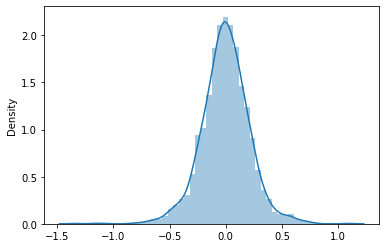

In [728]:
# 4. Error terms are supposed to be normally disrtibuted
sns.distplot(x=residual, kde=True)

In [556]:
#Looks almost normal

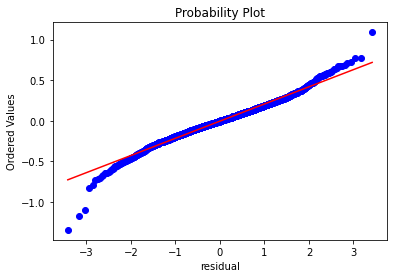

In [729]:
#Using q-q plot
stat.probplot(residual,dist='norm',plot=pylab)  #yaxiswill have normally distributed data  
plt.xlabel('residual') #labeling x axis    
plt.show()

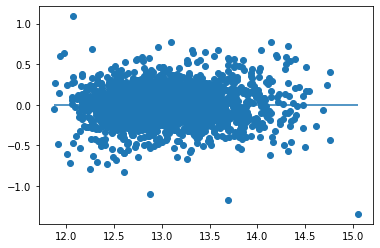

In [730]:
#5 Homoskedasticity -  the error is constant along the values of the dependent variable.
plt.scatter(yhat, residual)
plt.hlines(y=0, xmin=yhat.min(), xmax=yhat.max())

In [ ]:
#approximate. but there are outliers predictions

In [731]:
#6. Error terms & independent variables must be uncorrelated
for variable in X_test_l:
    print(variable, np.corrcoef(X_test_l[variable], residual)[1,0])

bedrooms -0.0017819896358140003
bathrooms -0.00655760148567327
sqliv_relevant 0.033544811107661714
view -0.037247741196207745
grade -0.018462252882938773
sqft_above 0.009508827088389255
sqft_basement -0.013792170204308857
condition 0.027582781780512104
Age -0.016080887218546423
lat 0.0061951215400150045
yr_sold -0.028715936534463072
zip_rank by price 0.032905417691160226


In [ ]:
#No correlation

In [732]:
#7. No autocorrelation between errors

from statsmodels.stats.stattools import durbin_watson
durbin_watson(residual)

1.749935092784361

    Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
    0 to 2.5< is positive autocorrelation
    >2 to 4 is negative autocorrelation
###### as our statistic is between 1.5 & 2.5, hence we don't have autocorrelation

### Comparison between decision tree & Linear regression

#### linear Regression
RMSE =  32.0
MAPE =  16.42873737781194
R2=  0.8025537578702201
adjusted_r2=  0.8023104476519455
##### Decision Tree
RMSE =  2.0
MAPE =  17.935014807370653
r2=  0.8100696907766642
Adjusted r2=  0.8090510876331397